# HOUSING PRICES KEY SUPPLY-DEMAND FACTORS
### BY KONARK PAHUJA 21/04/22

### IMPORTS

In [724]:
import numpy as np 
import pandas as pd 
import seaborn as sb
import matplotlib.pyplot as plt 
%matplotlib inline 
from functools import reduce
import requests 

In [725]:
sb.set_style("whitegrid")

### FUNCTIONS

In [726]:
def cleanup(df, col_name):
    df['DATE'] = pd.to_datetime(df["DATE"])
    df['year'] = df['DATE'].dt.year
    df = df.groupby("year", as_index=True).mean()
    df.rename(columns = {list(df)[0]: col_name}, inplace =True)    
    return df

In [727]:
def cleanupIncome(df):
    #df = df[0]
    cols_to_drop=[0,1,2]
    df.drop(columns=df.columns[cols_to_drop],inplace=True)
    df.dropna(inplace=True, axis=0)
    df.drop([0,1], inplace=True)
    df.reset_index(drop=True, inplace=True)
    #return df
        

In [728]:
def cleanupEdu(df):
    #df = df[0]
    cols_to_drop=[0,1,3]
    df.drop(columns=df.columns[cols_to_drop],inplace=True)
    df.dropna(inplace=True, axis=0)
    df.drop([0,1], inplace=True)
    df.reset_index(drop=True, inplace=True)
    #return df
        

In [729]:
def cleanupFam(df):
    #df = df[0]
    cols_to_drop=[0,1]
    df.drop(columns=df.columns[cols_to_drop],inplace=True)
    df.dropna(inplace=True, axis=0)
    df.drop([0,1], inplace=True)
    df.reset_index(drop=True, inplace=True)
    #return df        

# HOUSING PRICES

### LOAD DATA

In [730]:
#source: https://fred.stlouisfed.org/

#S&P/Case-Shiller U.S. National Home Price Index (CSUSHPISA)
housing_prices = pd.read_csv("Data/CSUSHPISA.csv")

#Homeownership Rate in the United States (RSAHORUSQ156S)
home_ownership = pd.read_csv("Data/RSAHORUSQ156S.csv")

In [731]:
housing_prices.head()

DATE  CSUSHPISA
0  2002-01-01    117.143
1  2002-02-01    117.845
2  2002-03-01    118.687
3  2002-04-01    119.611
4  2002-05-01    120.724

### CLEAN DATA

In [732]:
housing_prices = cleanup(housing_prices,"median housing price")
home_ownership = cleanup(home_ownership,"home ownership %")

In [733]:
housing_prices

median housing price
year                      
2002            122.279000
2003            133.731417
2004            150.440333
2005            171.737000
2006            183.447833
2007            179.919500
2008            164.058167
2009            148.543583
2010            144.671250
2011            139.259167
2012            140.992833
2013            154.522083
2014            164.700750
2015            172.189917
2016            180.934667
2017            191.408667
2018            202.484333
2019            209.481250
2020            222.144333
2021            260.080667
2022            284.330000

### VISUALISE

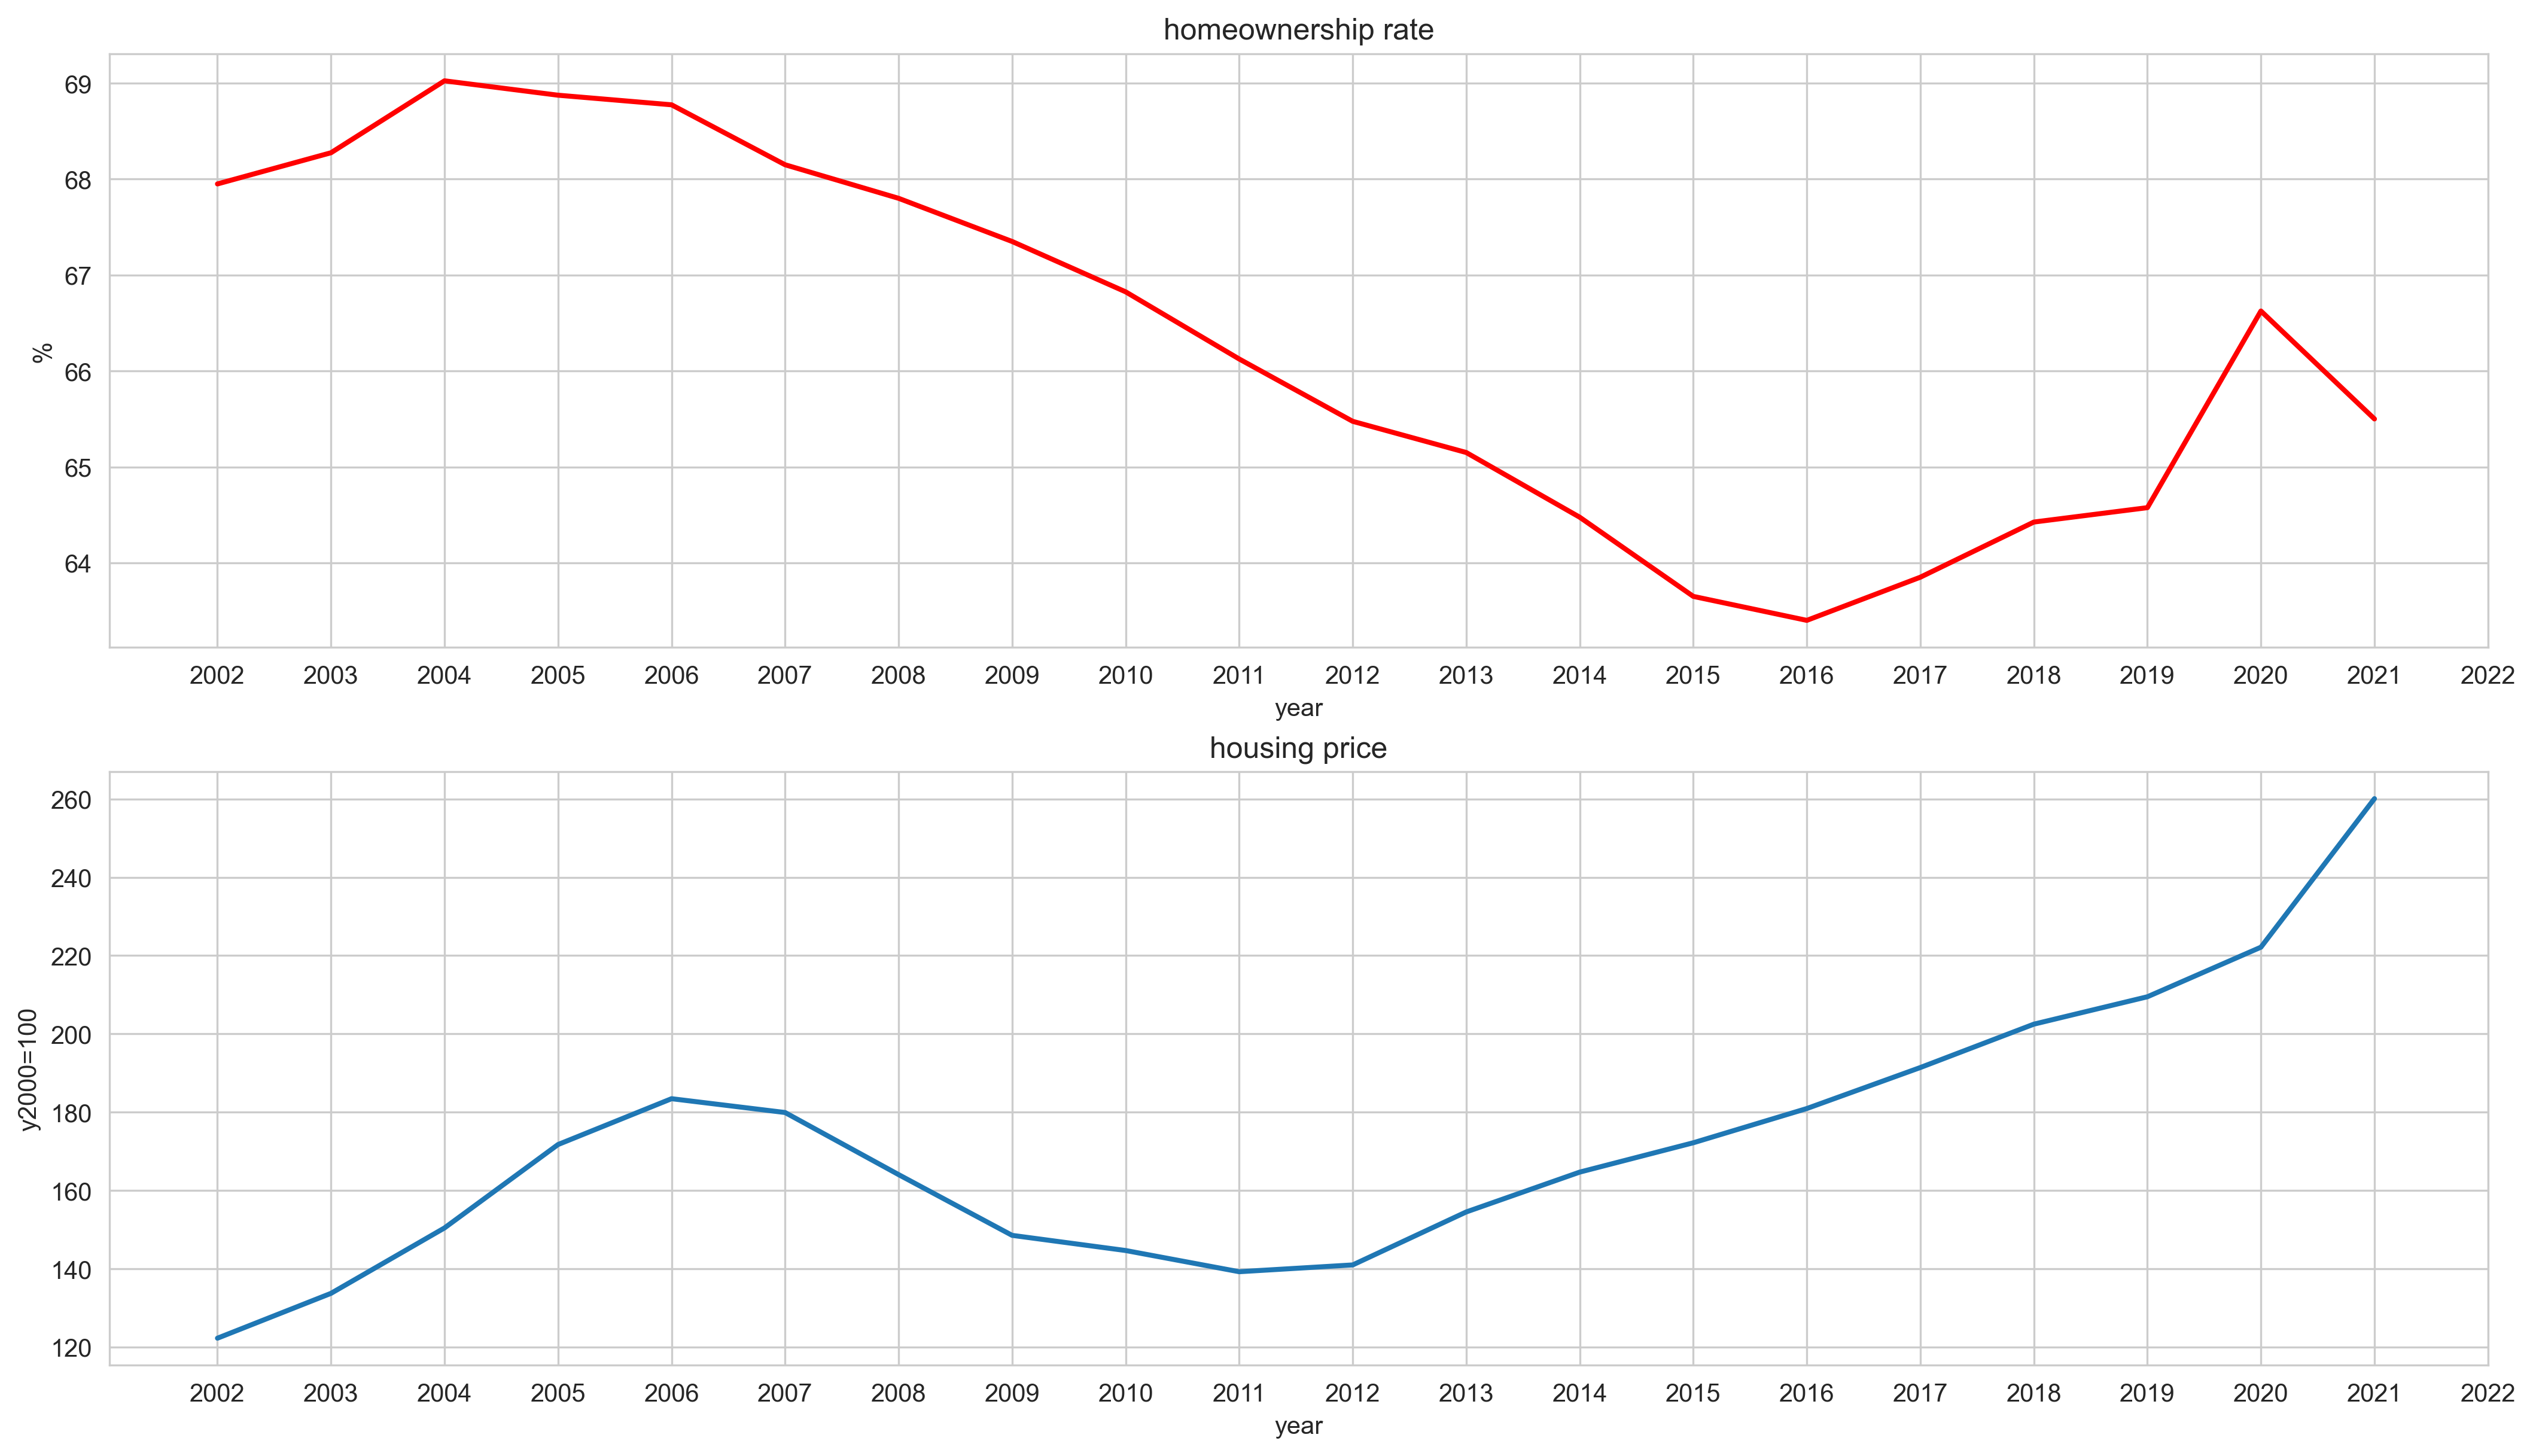

In [734]:

figure,ax = plt.subplots(2,1,constrained_layout=True,figsize=(14,8),dpi=300) 


#homeownership rate
sb.lineplot(ax=ax[0],data = own_price, x="year", y="home ownership %", linewidth = 2,color='r')
ax[0].set_title("homeownership rate")
ax[0].set(xlabel="year", ylabel = "%")
ax[0].set_xticks(np.arange(2002, 2023, 1.0)) 


#housing prices
sb.lineplot(ax=ax[1],data = own_price, x="year", y="median housing price", linewidth = 2)
ax[1].set_title("housing price")
ax[1].set(xlabel="year", ylabel = "y2000=100")
ax[1].set_xticks(np.arange(2002, 2023, 1.0)) 

# SUPPLY FACTORS:

## 1. PRODUCTION

### 1.1 CONSTRUCTION STAGES

### LOAD DATA

In [735]:
#STAGES OF CONSTRUCTION:

#source: https://fred.stlouisfed.org/

#Completed (NHFSEPCS) units *1000

df_stages_completed = pd.read_csv("Data/Supply/Stages/NHFSEPCS.csv")

#Under Construction (NHFSEPUCS)

df_stages_under_const = pd.read_csv("Data/Supply/Stages/NHFSEPUCS.csv")

#Not Started (NHFSEPNTS)

df_stages_not_start = pd.read_csv("Data/Supply/Stages/NHFSEPNTS.csv")

In [736]:
df_stages_completed

DATE  NHFSEPCS
0    2002-01-01      77.0
1    2002-02-01      79.0
2    2002-03-01      80.0
3    2002-04-01      83.0
4    2002-05-01      83.0
..          ...       ...
236  2021-09-01      34.0
237  2021-10-01      35.0
238  2021-11-01      34.0
239  2021-12-01      33.0
240  2022-01-01      34.0

[241 rows x 2 columns]

### CLEAN DATA

In [737]:
df_stages_completed = cleanup(df_stages_completed,"completed")
df_stages_under_const = cleanup(df_stages_under_const,"under construction")
df_stages_not_start = cleanup(df_stages_not_start, "not started")

In [738]:
df_supply_house_stages = pd.concat([df_stages_completed, df_stages_under_const,df_stages_not_start]
                                   ,axis=1)

In [739]:
df_supply_house_stages

completed  under construction  not started
year                                             
2002   82.500000          199.000000    46.000000
2003   80.833333          213.916667    53.666667
2004   89.916667          243.250000    62.166667
2005  106.750000          279.500000    81.416667
2006  144.083333          318.166667    91.083333
2007  185.416667          267.166667    78.500000
2008  179.083333          190.416667    56.000000
2009  128.000000          115.750000    35.083333
2010   86.500000           97.083333    27.750000
2011   65.500000           77.166667    24.666667
2012   44.500000           77.750000    23.583333
2013   40.000000           99.083333    29.500000
2014   50.250000          117.750000    32.250000
2015   51.583333          127.333333    37.166667
2016   58.333333          146.583333    38.083333
2017   62.250000          165.666667    47.333333
2018   66.500000          191.250000    56.166667
2019   77.500000          198.083333    54.750000
2020   60.416667          184.083333    59.250000
2021   34.583333          224.666667    90.250000
2022   34.000000          265.000000   102.500000

### VISUALISE:

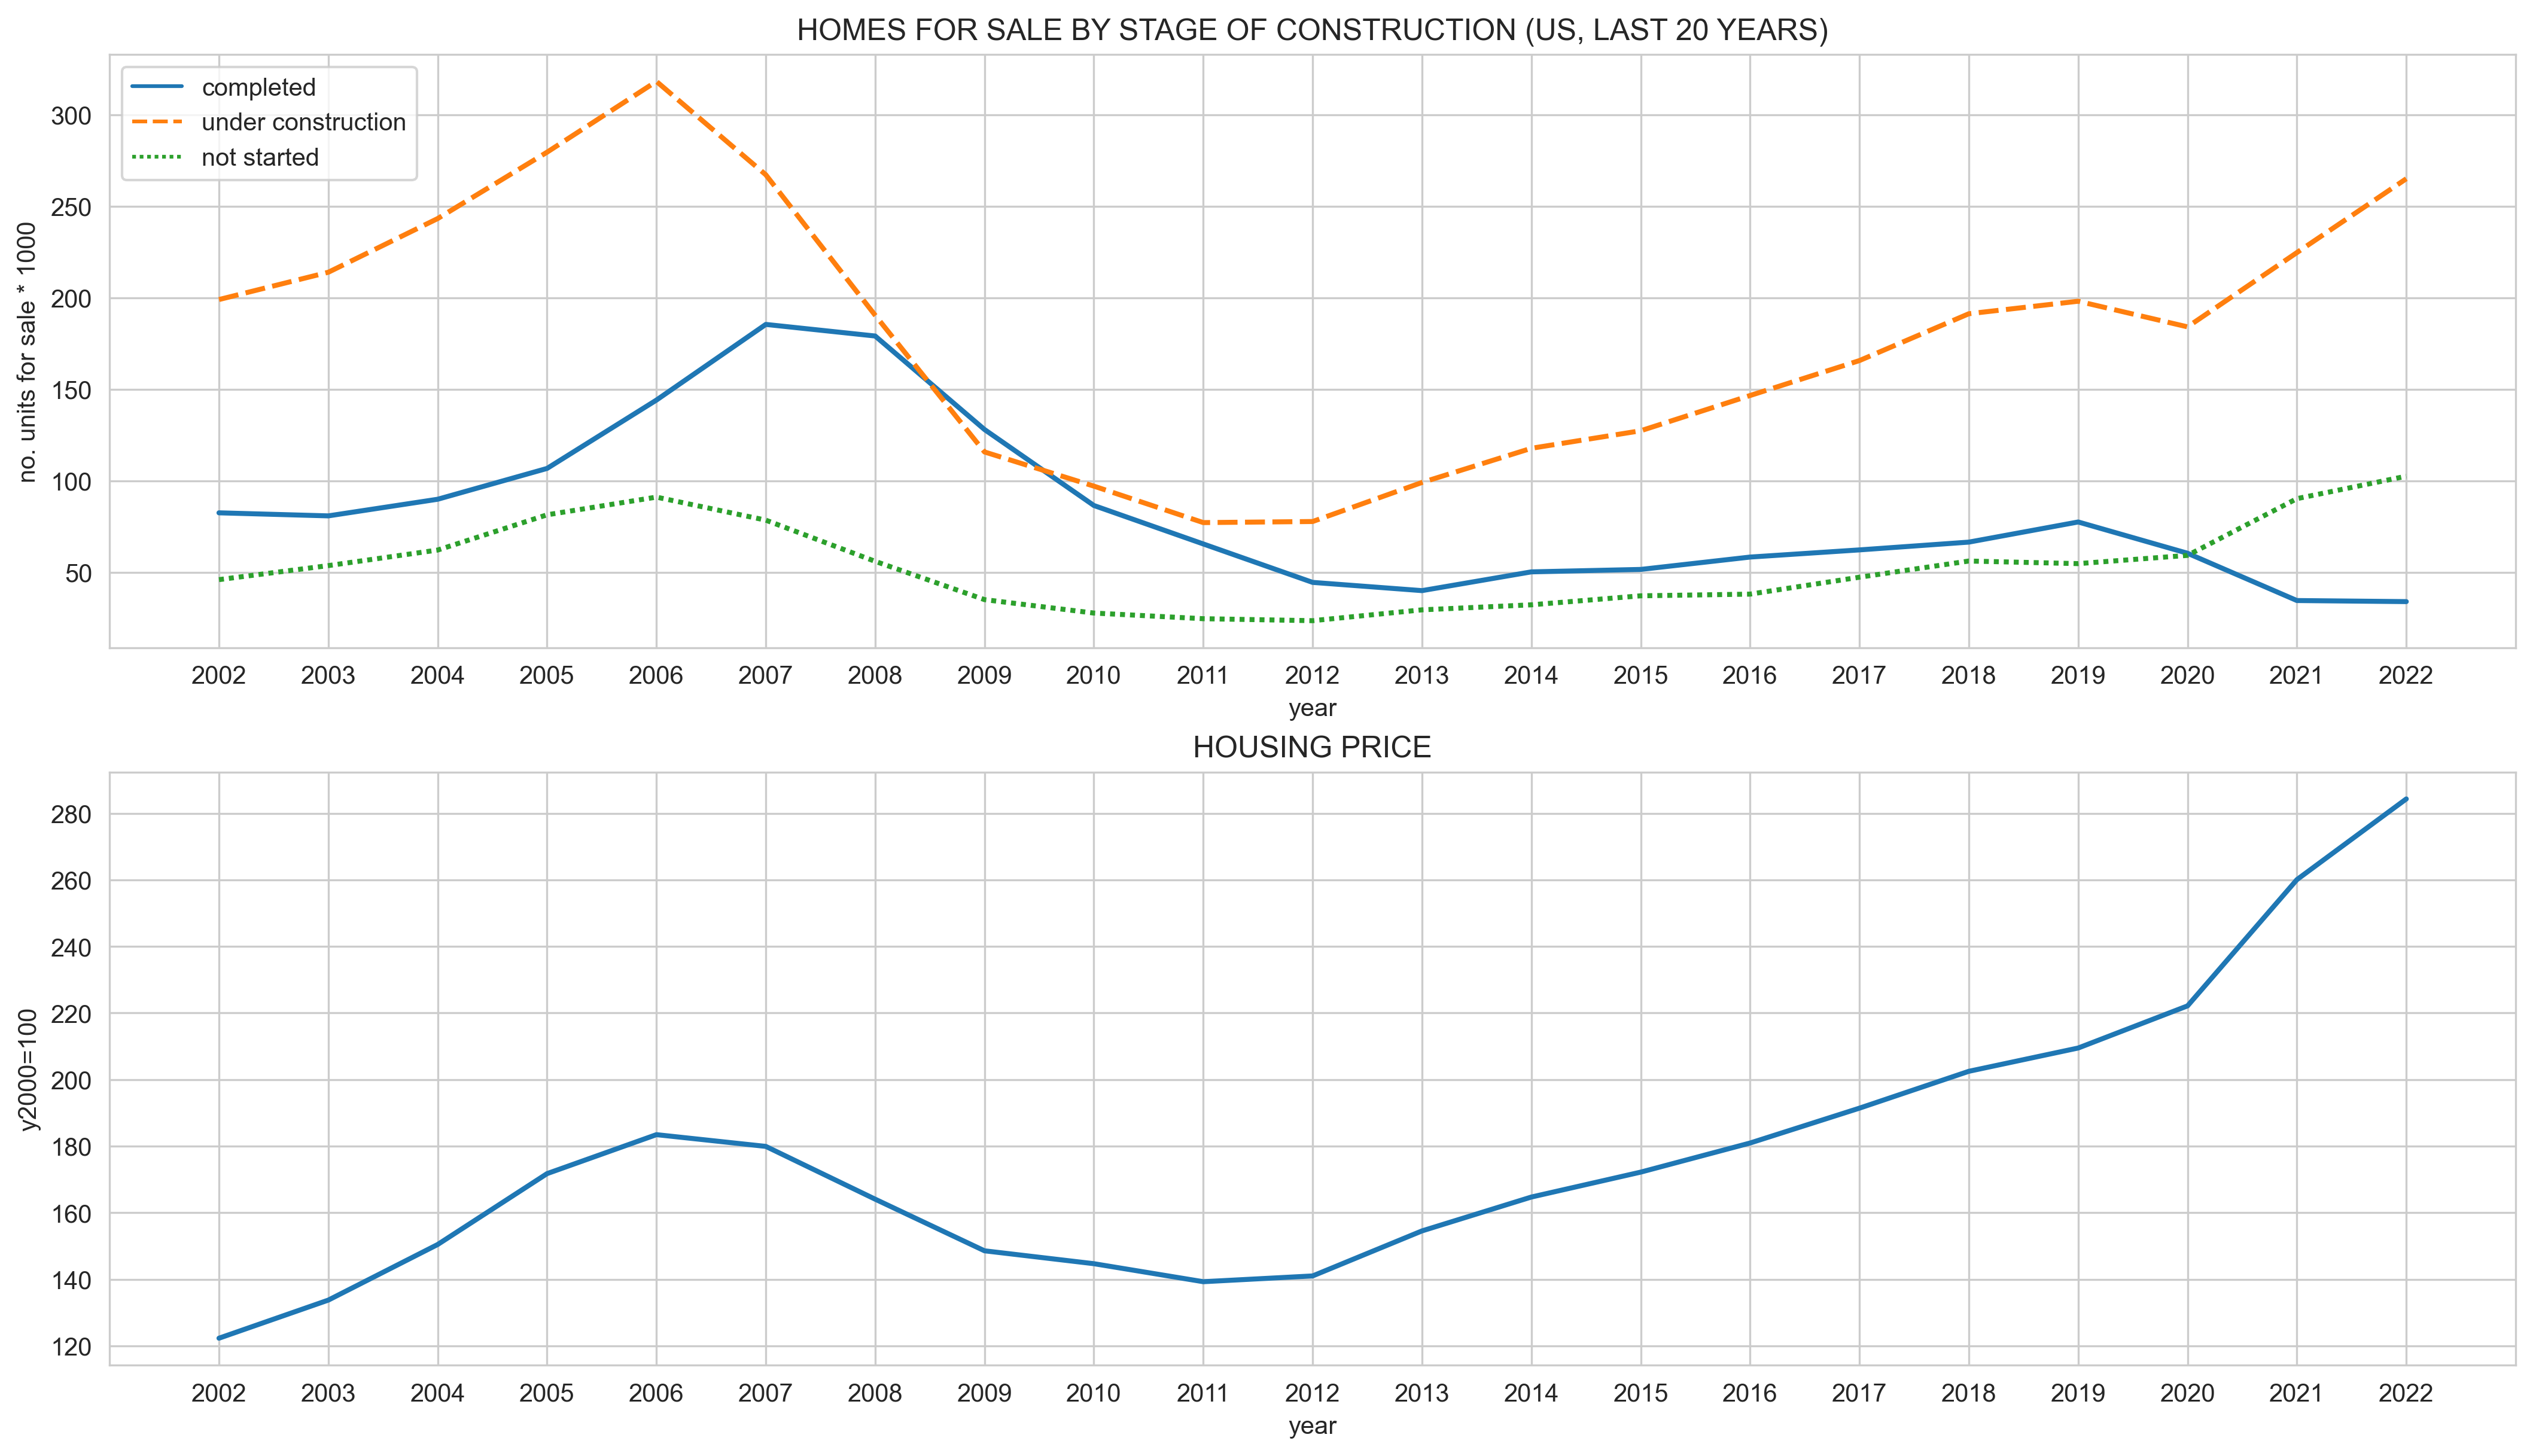

In [740]:
figure,ax = plt.subplots(2,1,constrained_layout=True,figsize=(14,8),dpi=300) 

#homes for sale by construction  
sb.lineplot(ax= ax[0],data = df_supply_house_stages,
            linewidth = 2)
ax[0].set(xlabel="year", ylabel = "no. units for sale * 1000")
ax[0].set_title("HOMES FOR SALE BY STAGE OF CONSTRUCTION (US, LAST 20 YEARS)")
ax[0].set_xticks(np.arange(2002, 2023, 1.0))


#housing prices
sb.lineplot(ax=ax[1],data = housing_prices, x="year", y="median housing price", linewidth = 2)
ax[1].set_title("HOUSING PRICE")
ax[1].set(xlabel="year", ylabel = "y2000=100")
ax[1].set_xticks(np.arange(2002, 2023, 1.0)) 


### 1.2 CONSTRUCTION COSTS

### LOAD DATA

In [741]:
#STAGES OF CONSTRUCTION: 

#source: https://fred.stlouisfed.org/

#Producer Price Index by Commodity: Special Indexes: Construction Materials (WPUSI012011)

df_cost_mat = pd.read_csv("Data/Supply/Costs/WPUSI012011.csv")

# Producer Price Index by Industry: Construction Machinery Manufacturing (PCU333120333120)

df_cost_mach = pd.read_csv("Data/Supply/Costs/PCU333120333120.csv")

# Import Price Index (End Use): Crude Oil (IR10000)

df_cost_oil = pd.read_csv("Data/Supply/Costs/IR10000.csv")

#Import Price Index (End Use): Natural Gas (IR10110)

df_cost_gas = pd.read_csv("Data/Supply/Costs/IR10110.csv")

#All Employees, Residential Building (CES2023610001)

df_cost_labour = pd.read_csv("Data/Supply/Costs/CES2023610001.csv")

In [742]:
df_cost_mat

DATE  WPUSI012011
0    2002-01-01      142.000
1    2002-02-01      142.200
2    2002-03-01      143.200
3    2002-04-01      143.500
4    2002-05-01      143.800
..          ...          ...
236  2021-09-01      317.136
237  2021-10-01      322.120
238  2021-11-01      328.940
239  2021-12-01      335.066
240  2022-01-01      345.359

[241 rows x 2 columns]

### CLEAN DATA

In [743]:
df_cost_mat = cleanup(df_cost_mat,"price: construction materials")
df_cost_mach = cleanup(df_cost_mach, "price: construction machinery")
df_cost_oil = cleanup(df_cost_oil,"price: crude oil import")
df_cost_gas = cleanup(df_cost_gas,"price: natural gas import")
df_cost_labour = cleanup(df_cost_labour, "employees: residential construct.")

In [744]:
df_supply_costs = pd.concat([df_cost_mat,df_cost_mach,df_cost_oil,df_cost_gas,df_cost_labour], axis=1)

In [745]:
df_supply_costs2 = pd.concat([df_cost_mat,df_cost_mach,df_cost_oil,df_cost_gas,df_cost_labour,housing_prices], axis=1)

In [746]:
#normalize
df_supply_costs_norm =(df_supply_costs-df_supply_costs.min())/(df_supply_costs.max()-df_supply_costs.min())


In [747]:
df_supply_costs_norm

price: construction materials  price: construction machinery  \
year                                                                 
2002                       0.000000                       0.000000   
2003                       0.015396                       0.020554   
2004                       0.086747                       0.067970   
2005                       0.126893                       0.139696   
2006                       0.179951                       0.213620   
2007                       0.194520                       0.262595   
2008                       0.260408                       0.318375   
2009                       0.224318                       0.384289   
2010                       0.250765                       0.378761   
2011                       0.283668                       0.441061   
2012                       0.307010                       0.505771   
2013                       0.324144                       0.537736   
2014                       0.349846                       0.565023   
2015                       0.345335                       0.589546   
2016                       0.347073                       0.605068   
2017                       0.385563                       0.616337   
2018                       0.455631                       0.637104   
2019                       0.455507                       0.732857   
2020                       0.472683                       0.772406   
2021                       0.791690                       0.874761   
2022                       1.000000                       1.000000   

      price: crude oil import  price: natural gas import  \
year                                                       
2002                 0.000000                   0.052609   
2003                 0.055671                   0.262700   
2004                 0.156204                   0.318390   
2005                 0.317109                   0.556326   
2006                 0.444504                   0.460774   
2007                 0.534092                   0.438282   
2008                 0.878037                   0.658733   
2009                 0.447099                   0.173772   
2010                 0.651244                   0.222338   
2011                 0.991920                   0.210013   
2012                 1.000000                   0.053803   
2013                 0.973678                   0.184132   
2014                 0.898900                   0.353245   
2015                 0.336702                   0.069940   
2016                 0.220523                   0.000000   
2017                 0.359511                   0.061429   
2018                 0.516066                   0.090083   
2019                 0.489339                   0.084883   
2020                 0.236332                   0.137262   
2021                 0.600492                   0.506412   
2022                 0.746183                   1.000000   

      employees: residential construct.  
year                                     
2002                           0.537932  
2003                           0.614850  
2004                           0.745344  
2005                           0.890854  
2006                           1.000000  
2007                           0.862909  
2008                           0.565144  
2009                           0.166707  
2010                           0.015861  
2011                           0.000000  
2012                           0.035161  
2013                           0.104523  
2014                           0.211696  
2015                           0.289929  
2016                           0.373217  
2017                           0.422585  
2018                           0.524440  
2019                           0.574540  
2020                           0.548362  
2021                           0.666153  
2022                           0.721046

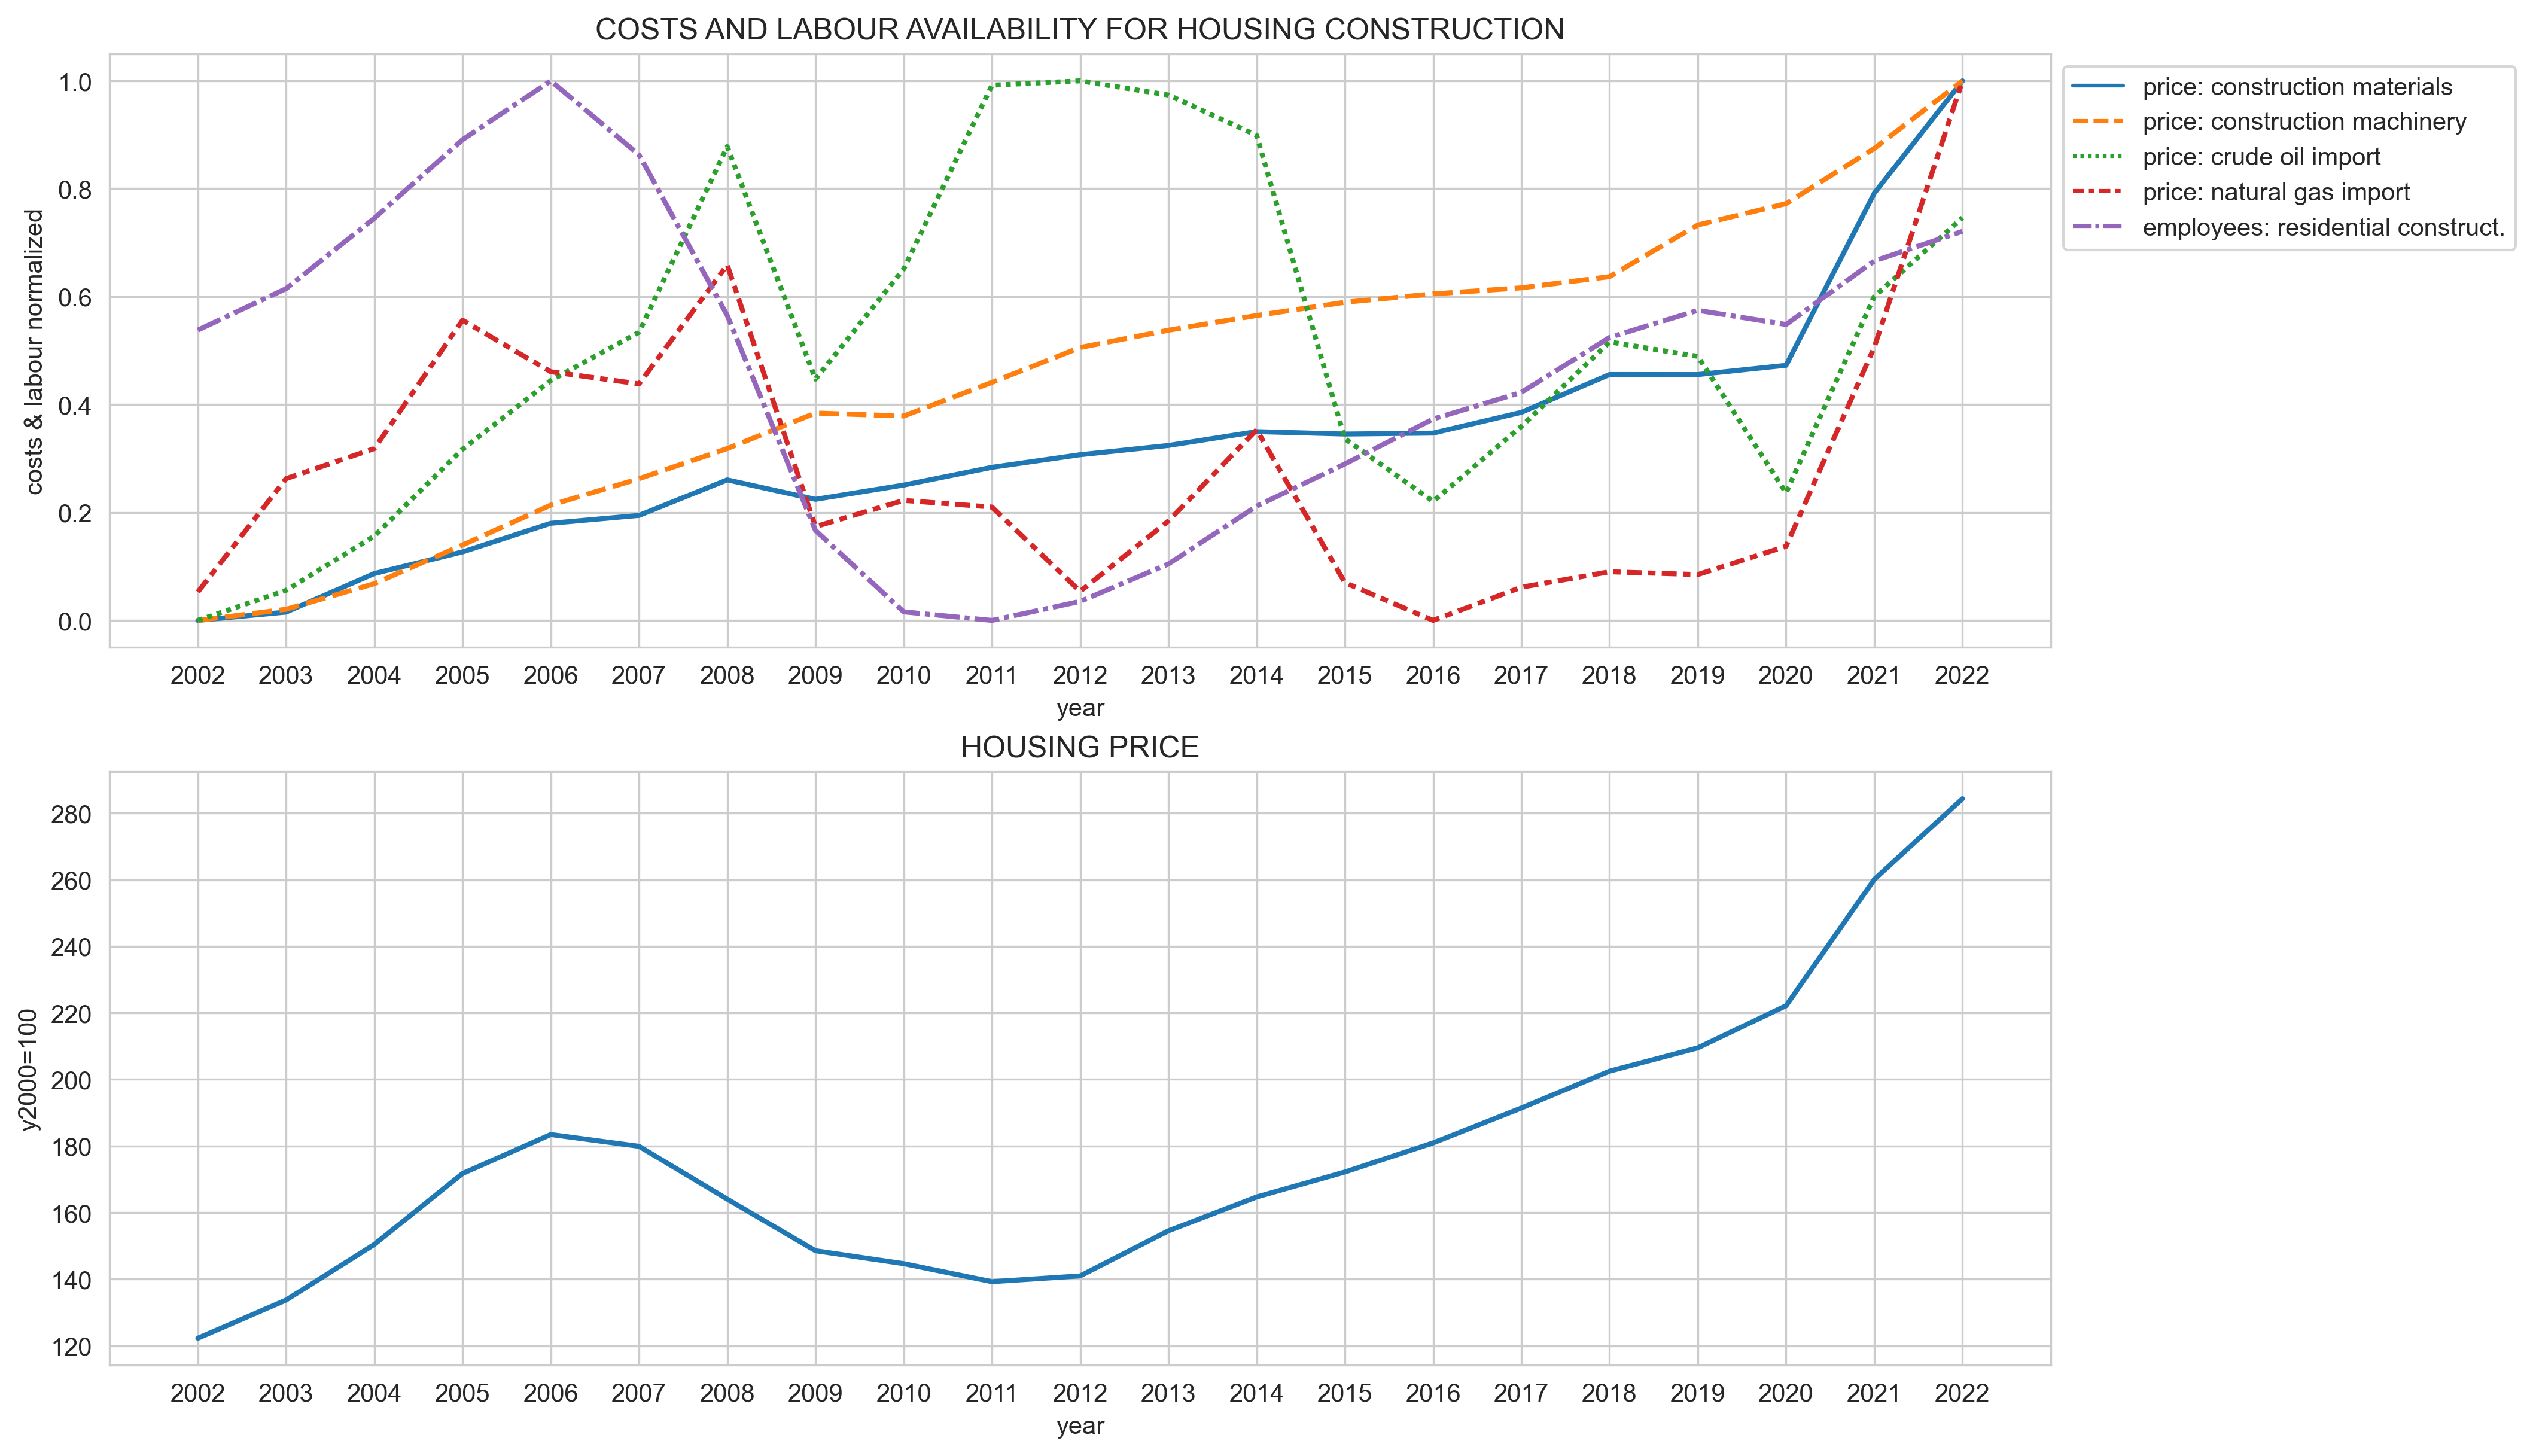

In [748]:
figure,ax = plt.subplots(2,1,constrained_layout=True,figsize=(14,8),dpi=300) 

#housing construction costs  
sb.lineplot(ax= ax[0],data = df_supply_costs_norm,
            linewidth = 2)
ax[0].set(xlabel="year", ylabel = "costs & labour normalized")
ax[0].set_title("COSTS AND LABOUR AVAILABILITY FOR HOUSING CONSTRUCTION")
ax[0].set_xticks(np.arange(2002, 2023, 1.0))
ax[0].legend(loc='best', bbox_to_anchor=(1, 1))

#housing prices
sb.lineplot(ax=ax[1],data = housing_prices, x="year", y="median housing price", linewidth = 2)
ax[1].set_title("HOUSING PRICE")
ax[1].set(xlabel="year", ylabel = "y2000=100")
ax[1].set_xticks(np.arange(2002, 2023, 1.0)) 


# 2. POLICY:

## 2.1 ZONING

### LOAD DATA

In [753]:
#source: https://fred.stlouisfed.org/

#New Privately-Owned Housing Units Authorized in Permit-Issuing Places: Single-Family Units (PERMIT1)

df_zone_1 = pd.read_csv("Data/Supply/zone/PERMIT1.csv")

#New Privately-Owned Housing Units Authorized in Permit-Issuing Places: Units in Buildings with 2-4 Units (PERMIT24)

df_zone_24 = pd.read_csv("Data/Supply/zone/PERMIT24.csv")

#New Privately-Owned Housing Units Authorized in Permit-Issuing Places: Units in Buildings with 5 Units or More (PERMIT5)

df_zone_5 = pd.read_csv("Data/Supply/zone/PERMIT5.csv")

# New Privately-Owned Housing Units Authorized in Permit-Issuing Places: Total Units (PERMIT)	

df_zone_tot = pd.read_csv("Data/Supply/zone/PERMIT.csv")


In [750]:
df_zone_1

DATE  PERMIT1
0    2002-01-01   1285.0
1    2002-02-01   1401.0
2    2002-03-01   1289.0
3    2002-04-01   1285.0
4    2002-05-01   1289.0
..          ...      ...
236  2021-09-01   1041.0
237  2021-10-01   1074.0
238  2021-11-01   1106.0
239  2021-12-01   1128.0
240  2022-01-01   1213.0

[241 rows x 2 columns]

### CLEAN DATA

In [30]:
df_zone_1 = cleanup(df_zone_1,"single family unit")
df_zone_24 = cleanup(df_zone_24,"2-4 units")
df_zone_5 = cleanup(df_zone_5, ">5 units")
df_zone_tot = cleanup(df_zone_tot, "total units")

In [31]:
merge_dfs = [df_zone_1, df_zone_24,df_zone_5,df_zone_tot]

In [530]:
df_zoning = pd.concat(merge_dfs,axis=1)

In [751]:
df_zoning

single family unit  2-4 units    >5 units  total units
year                                                        
2002         1335.500000  73.333333  340.166667  1749.000000
2003         1461.083333  82.583333  344.750000  1888.416667
2004         1604.250000  90.333333  363.000000  2057.583333
2005         1684.500000  84.083333  391.500000  2160.083333
2006         1380.416667  77.166667  386.083333  1843.666667
2007          971.583333  59.416667  360.500000  1391.500000
2008          567.416667  34.166667  294.250000   895.833333
2009          439.583333  20.750000  121.666667   582.000000
2010          448.000000  21.833333  133.833333   603.666667
2011          420.000000  21.666667  182.333333   624.000000
2012          519.666667  25.916667  282.916667   828.500000
2013          619.083333  28.833333  340.083333   988.000000
2014          639.833333  29.500000  382.750000  1052.083333
2015          694.583333  31.500000  451.416667  1177.500000
2016          750.666667  34.583333  420.166667  1205.416667
2017          823.000000  37.500000  424.000000  1284.500000
2018          853.750000  40.083333  434.916667  1328.750000
2019          863.500000  41.916667  479.833333  1385.250000
2020          988.166667  47.333333  443.500000  1479.000000
2021         1116.833333  52.333333  544.666667  1713.833333
2022         1213.000000  57.000000  625.000000  1895.000000

### VISUALISE

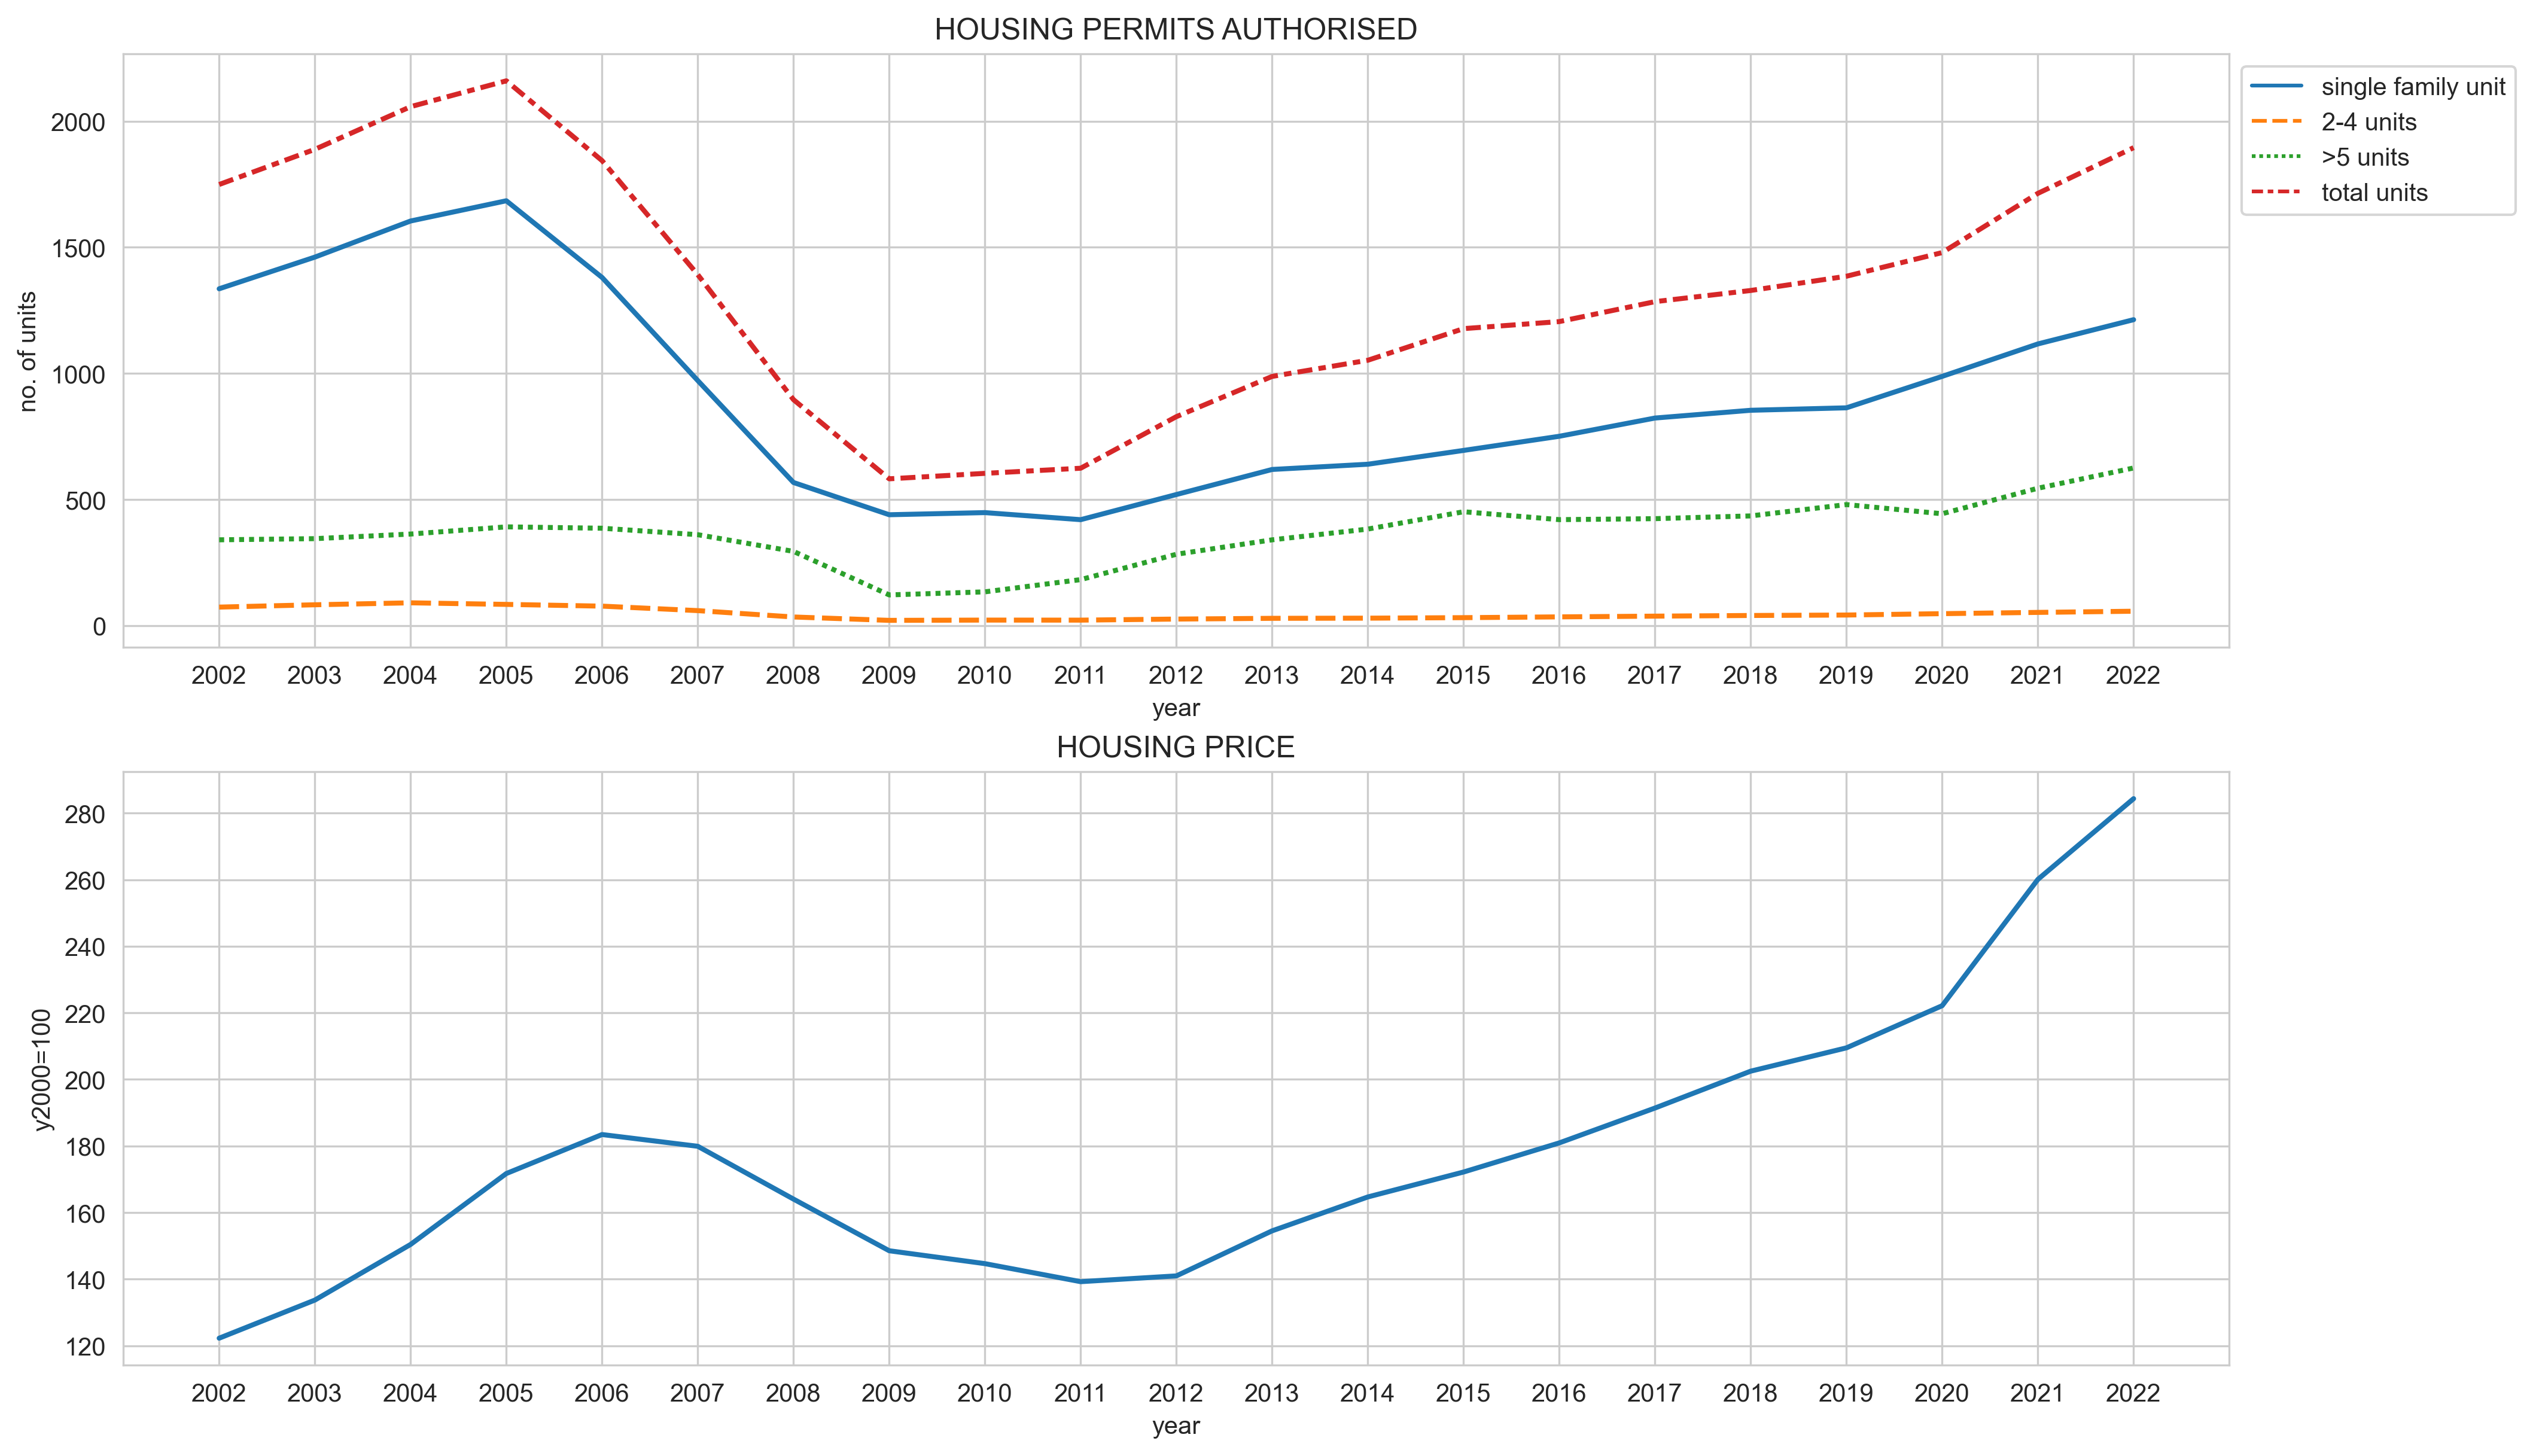

In [752]:
figure,ax = plt.subplots(2,1,constrained_layout=True,figsize=(14,8),dpi=300) 

#housing zoning  
sb.lineplot(ax= ax[0],data = df_zoning,
            linewidth = 2)
ax[0].set(xlabel="year", ylabel = "no. of units")
ax[0].set_title("HOUSING PERMITS AUTHORISED")
ax[0].set_xticks(np.arange(2002, 2023, 1.0))
ax[0].legend(loc='best', bbox_to_anchor=(1, 1))

#housing prices
sb.lineplot(ax=ax[1],data = housing_prices, x="year", y="median housing price", linewidth = 2)
ax[1].set_title("HOUSING PRICE")
ax[1].set(xlabel="year", ylabel = "y2000=100")
ax[1].set_xticks(np.arange(2002, 2023, 1.0)) 


# 3. MARKET

### LOAD DATA

In [758]:
#Data from Redfin

# Data for new vs existing sale nos. 2012-2022:
df_mark_sales = pd.read_csv("Data/Supply/Market/sales.csv", encoding='utf-16', sep= '\t')

#Data for new vs existing sale median prices 2012-2022:
df_mark_prices = pd.read_csv("Data/Supply/Market/median price.csv", encoding='utf-16', sep= '\t')

In [759]:
df_mark_prices

Region  Period End Is New Construction Transaction  \
0        National  31/01/2022                New Construction   
1        National  31/01/2022                        Existing   
2        National  31/12/2021                New Construction   
3        National  31/12/2021                        Existing   
4        National  30/11/2021                New Construction   
...           ...         ...                             ...   
1205  West Region  31/03/2012                        Existing   
1206  West Region  29/02/2012                New Construction   
1207  West Region  29/02/2012                        Existing   
1208  West Region  31/01/2012                New Construction   
1209  West Region  31/01/2012                        Existing   

          Measure Names  Measure Values  
0     Median Sale Price          462202  
1     Median Sale Price          364864  
2     Median Sale Price          454040  
3     Median Sale Price          371363  
4     Median Sale Price          448327  
...                 ...             ...  
1205  Median Sale Price          219000  
1206  Median Sale Price          295000  
1207  Median Sale Price          203000  
1208  Median Sale Price          289900  
1209  Median Sale Price          200000  

[1210 rows x 5 columns]

### CLEAN DATA

In [760]:
df_mark_sales.drop(["Region","Measure Names"], axis=1,inplace=True)
df_mark_prices.drop(["Region","Measure Names"], axis=1,inplace=True)

In [761]:
df_mark_sales['New Construction Sales'] = None 
df_mark_sales['Existing House Sales'] = None

df_mark_prices['New Construction Median Sale Price'] = None 
df_mark_prices['Existing House Median Sale Price'] = None


In [762]:
df_mark_sales["New Construction Sales"] = df_mark_sales.loc[0::2, "Measure Values"]
df_mark_sales["Existing House Sales"] = df_mark_sales.loc[1::2, "Measure Values"]
df_mark_sales.drop(columns=["Is New Construction Transaction","Measure Values"], inplace=True)

df_mark_prices["New Construction Median Sale Price"] = df_mark_prices.loc[0::2, "Measure Values"]
df_mark_prices["Existing House Median Sale Price"] = df_mark_prices.loc[1::2, "Measure Values"]
df_mark_prices.drop(columns=["Is New Construction Transaction","Measure Values"], inplace=True)

In [763]:
df_mark_sales["Existing House Sales"] = df_mark_sales['Existing House Sales'].shift(-1)
df_mark_prices["Existing House Median Sale Price"] = df_mark_prices['Existing House Median Sale Price'].shift(-1)

In [764]:
df_mark_sales.dropna(axis=0,inplace=True)
df_mark_prices.dropna(axis=0,inplace=True)

In [765]:
df_mark_sales['Period End'] = pd.to_datetime(df_mark_sales["Period End"])
df_mark_sales['year'] = df_mark_sales['Period End'].dt.year
df_mark_sales = df_mark_sales.groupby("year", as_index=True).mean()

df_mark_prices['Period End'] = pd.to_datetime(df_mark_prices["Period End"])
df_mark_prices['year'] = df_mark_prices['Period End'].dt.year
df_mark_prices= df_mark_prices.groupby("year", as_index=True).mean()


In [766]:
df_mark_sales

New Construction Sales  Existing House Sales
year                                              
2012            34580.750000         369505.583333
2013            39387.500000         405019.666667
2014            42371.000000         399952.333333
2015            47698.916667         439496.250000
2016            54597.416667         460166.250000
2017            60085.583333         469820.000000
2018            63256.083333         463107.833333
2019            67262.333333         463471.916667
2020            73824.583333         485277.416667
2021            63876.833333         537522.250000
2022            47406.000000         359777.000000

### VISUALISE

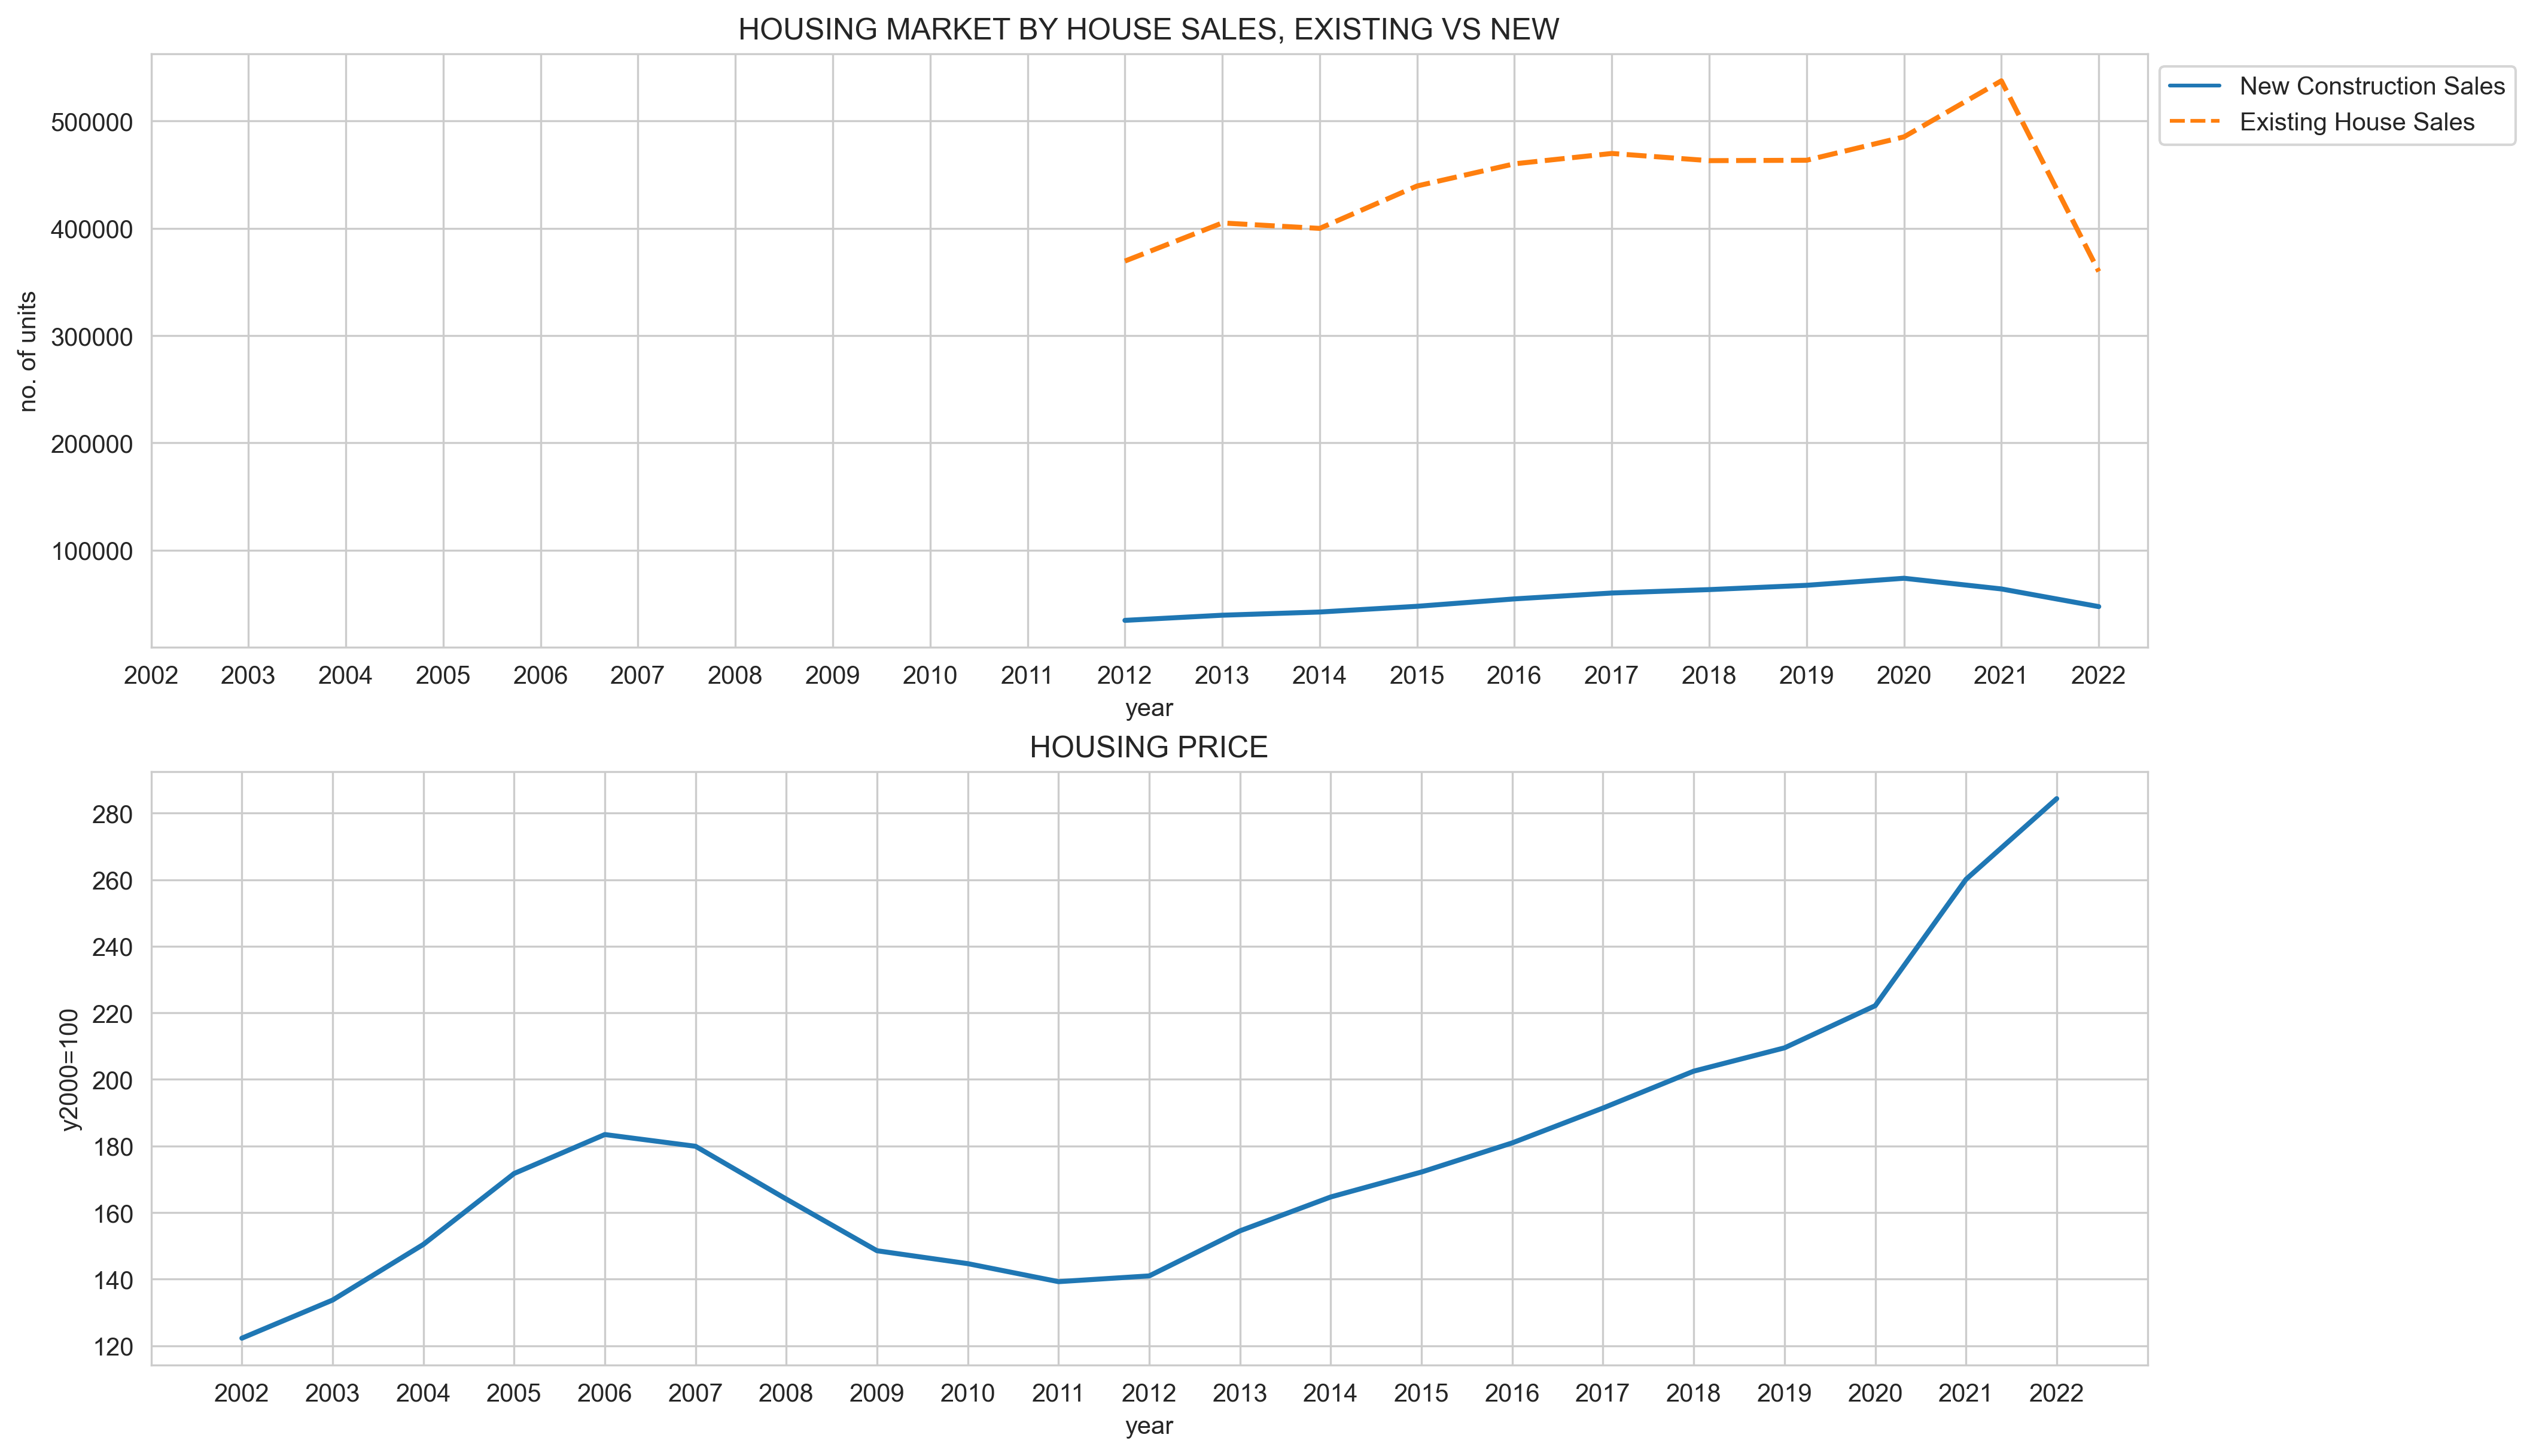

In [769]:
figure,ax = plt.subplots(2,1,constrained_layout=True,figsize=(14,8),dpi=300) 

#housing market  
sb.lineplot(ax= ax[0],data = df_mark_sales,
            linewidth = 2)
ax[0].set(xlabel="year", ylabel = "no. of units")
ax[0].set_title("HOUSING MARKET BY HOUSE SALES, EXISTING VS NEW")
ax[0].set_xticks(np.arange(2002, 2023, 1.0))
ax[0].legend(loc='best', bbox_to_anchor=(1, 1))

#housing prices
sb.lineplot(ax=ax[1],data = housing_prices, x="year", y="median housing price", linewidth = 2)
ax[1].set_title("HOUSING PRICE")
ax[1].set(xlabel="year", ylabel = "y2000=100")
ax[1].set_xticks(np.arange(2002, 2023, 1.0)) 


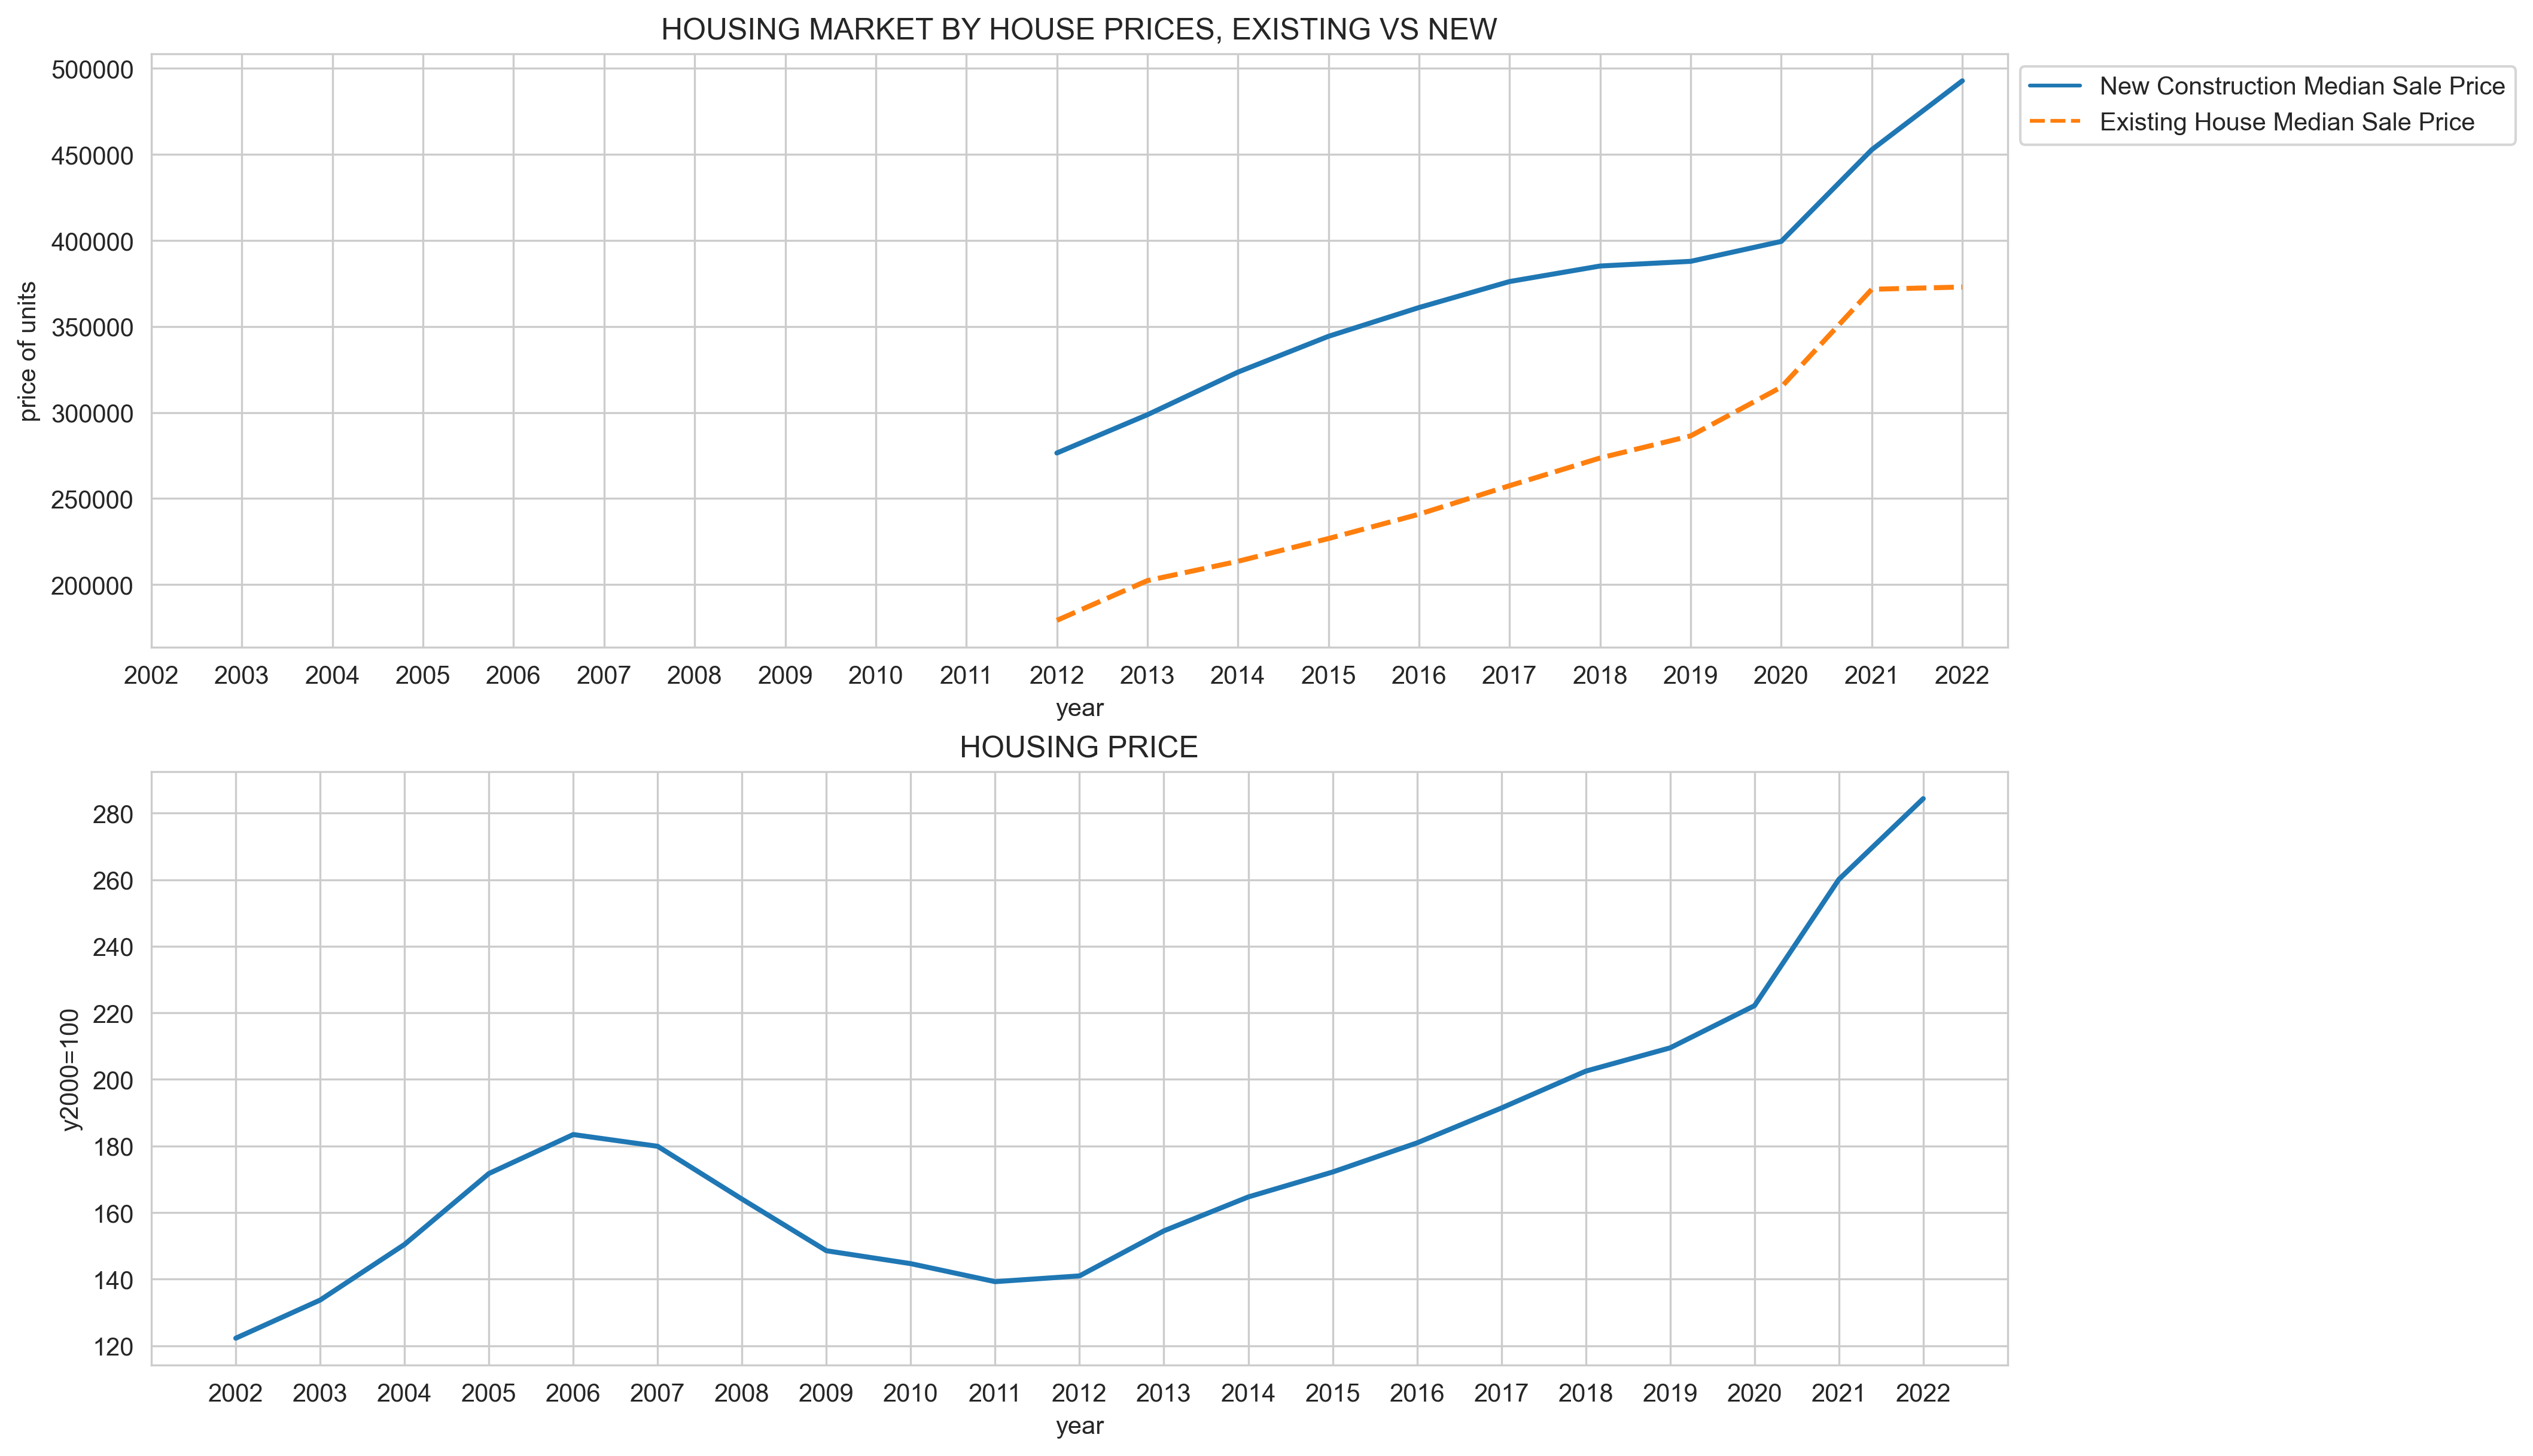

In [770]:
figure,ax = plt.subplots(2,1,constrained_layout=True,figsize=(14,8),dpi=300) 

#housing market  
sb.lineplot(ax= ax[0],data = df_mark_prices,
            linewidth = 2)
ax[0].set(xlabel="year", ylabel = "price of units")
ax[0].set_title("HOUSING MARKET BY HOUSE PRICES, EXISTING VS NEW")
ax[0].set_xticks(np.arange(2002, 2023, 1.0))
ax[0].legend(loc='best', bbox_to_anchor=(1, 1))

#housing prices
sb.lineplot(ax=ax[1],data = housing_prices, x="year", y="median housing price", linewidth = 2)
ax[1].set_title("HOUSING PRICE")
ax[1].set(xlabel="year", ylabel = "y2000=100")
ax[1].set_xticks(np.arange(2002, 2023, 1.0)) 


# DEMAND FACTORS:

## 1. ECONOMY 

### LOAD DATA

In [771]:
#source: https://fred.stlouisfed.org/


#30-Year Fixed Rate Mortgage Average in the United States (MORTGAGE30US) %

df_eco_mort = pd.read_csv("Data/Demand/Economy/MORTGAGE30US.csv")


#Consumer Price Index for All Urban Consumers: Owners' Equivalent Rent of Residences in U.S. City Average (CUSR0000SEHC)

df_eco_rent_eqv = pd.read_csv("Data/Demand/Economy/CUSR0000SEHC.csv")


#Consumer Price Index for All Urban Consumers: Rent of Primary Residence in U.S. City Average (CUSR0000SEHA)

df_eco_rent = pd.read_csv("Data/Demand/Economy/CUSR0000SEHA.csv")


#Real Gross Domestic Product (GDPC1): Billions of chained USD

df_eco_gdp = pd.read_csv("Data/Demand/Economy/GDPC1.csv")

#Inflation, consumer prices for the United States (FPCPITOTLZGUSA) %

df_eco_inf = pd.read_csv("Data/Demand/Economy/FPCPITOTLZGUSA.csv")

#Unemployment Rate (UNRATE)

df_eco_unemp = pd.read_csv("Data/Demand/Economy/UNRATE.csv")


In [772]:
df_eco_mort

DATE  MORTGAGE30US
0    2003-04-18          5.82
1    2003-04-25          5.79
2    2003-05-02          5.70
3    2003-05-09          5.62
4    2003-05-16          5.45
..          ...           ...
987  2022-03-17          4.16
988  2022-03-24          4.42
989  2022-03-31          4.67
990  2022-04-07          4.72
991  2022-04-14          5.00

[992 rows x 2 columns]

### CLEAN DATA

In [781]:
df_eco_mort = cleanup(df_eco_mort,"30y fixed mortgage %")
df_eco_rent_eqv = cleanup(df_eco_rent_eqv,"owner's rent equivalent")
df_eco_rent = cleanup(df_eco_rent, "rent")
df_eco_gdp = cleanup(df_eco_gdp, "real gdp")
df_eco_inf = cleanup(df_eco_inf,"inflation %")
df_eco_unemp = cleanup(df_eco_unemp,"unemployment %")

In [782]:
df_economy_rent = pd.concat([df_eco_rent,df_eco_rent_eqv],axis=1)

In [783]:
df_economy_rates = pd.concat([df_eco_mort,df_eco_inf,df_eco_unemp],axis=1)

In [773]:
df_economy_rates

30y fixed mortgage %  inflation %  unemployment %
year                                                   
2002                   NaN     1.586032        5.783333
2003              5.822632     2.270095        5.991667
2004              5.839231     2.677237        5.541667
2005              5.866731     3.392747        5.083333
2006              6.413269     3.225944        4.608333
2007              6.337308     2.852672        4.616667
2008              6.027170     3.839100        5.800000
2009              5.036538    -0.355546        9.283333
2010              4.689808     1.640043        9.608333
2011              4.447885     3.156842        8.933333
2012              3.657500     2.069337        8.075000
2013              3.975577     1.464833        7.358333
2014              4.168868     1.622223        6.158333
2015              3.850577     0.118627        5.275000
2016              3.654038     1.261583        4.875000
2017              3.989808     2.130110        4.358333
2018              4.544615     2.442583        3.891667
2019              3.935769     1.812210        3.675000
2020              3.111698     1.233584        8.091667
2021              2.957692          NaN        5.358333
2022              3.960667          NaN        4.000000

### VISUALISE

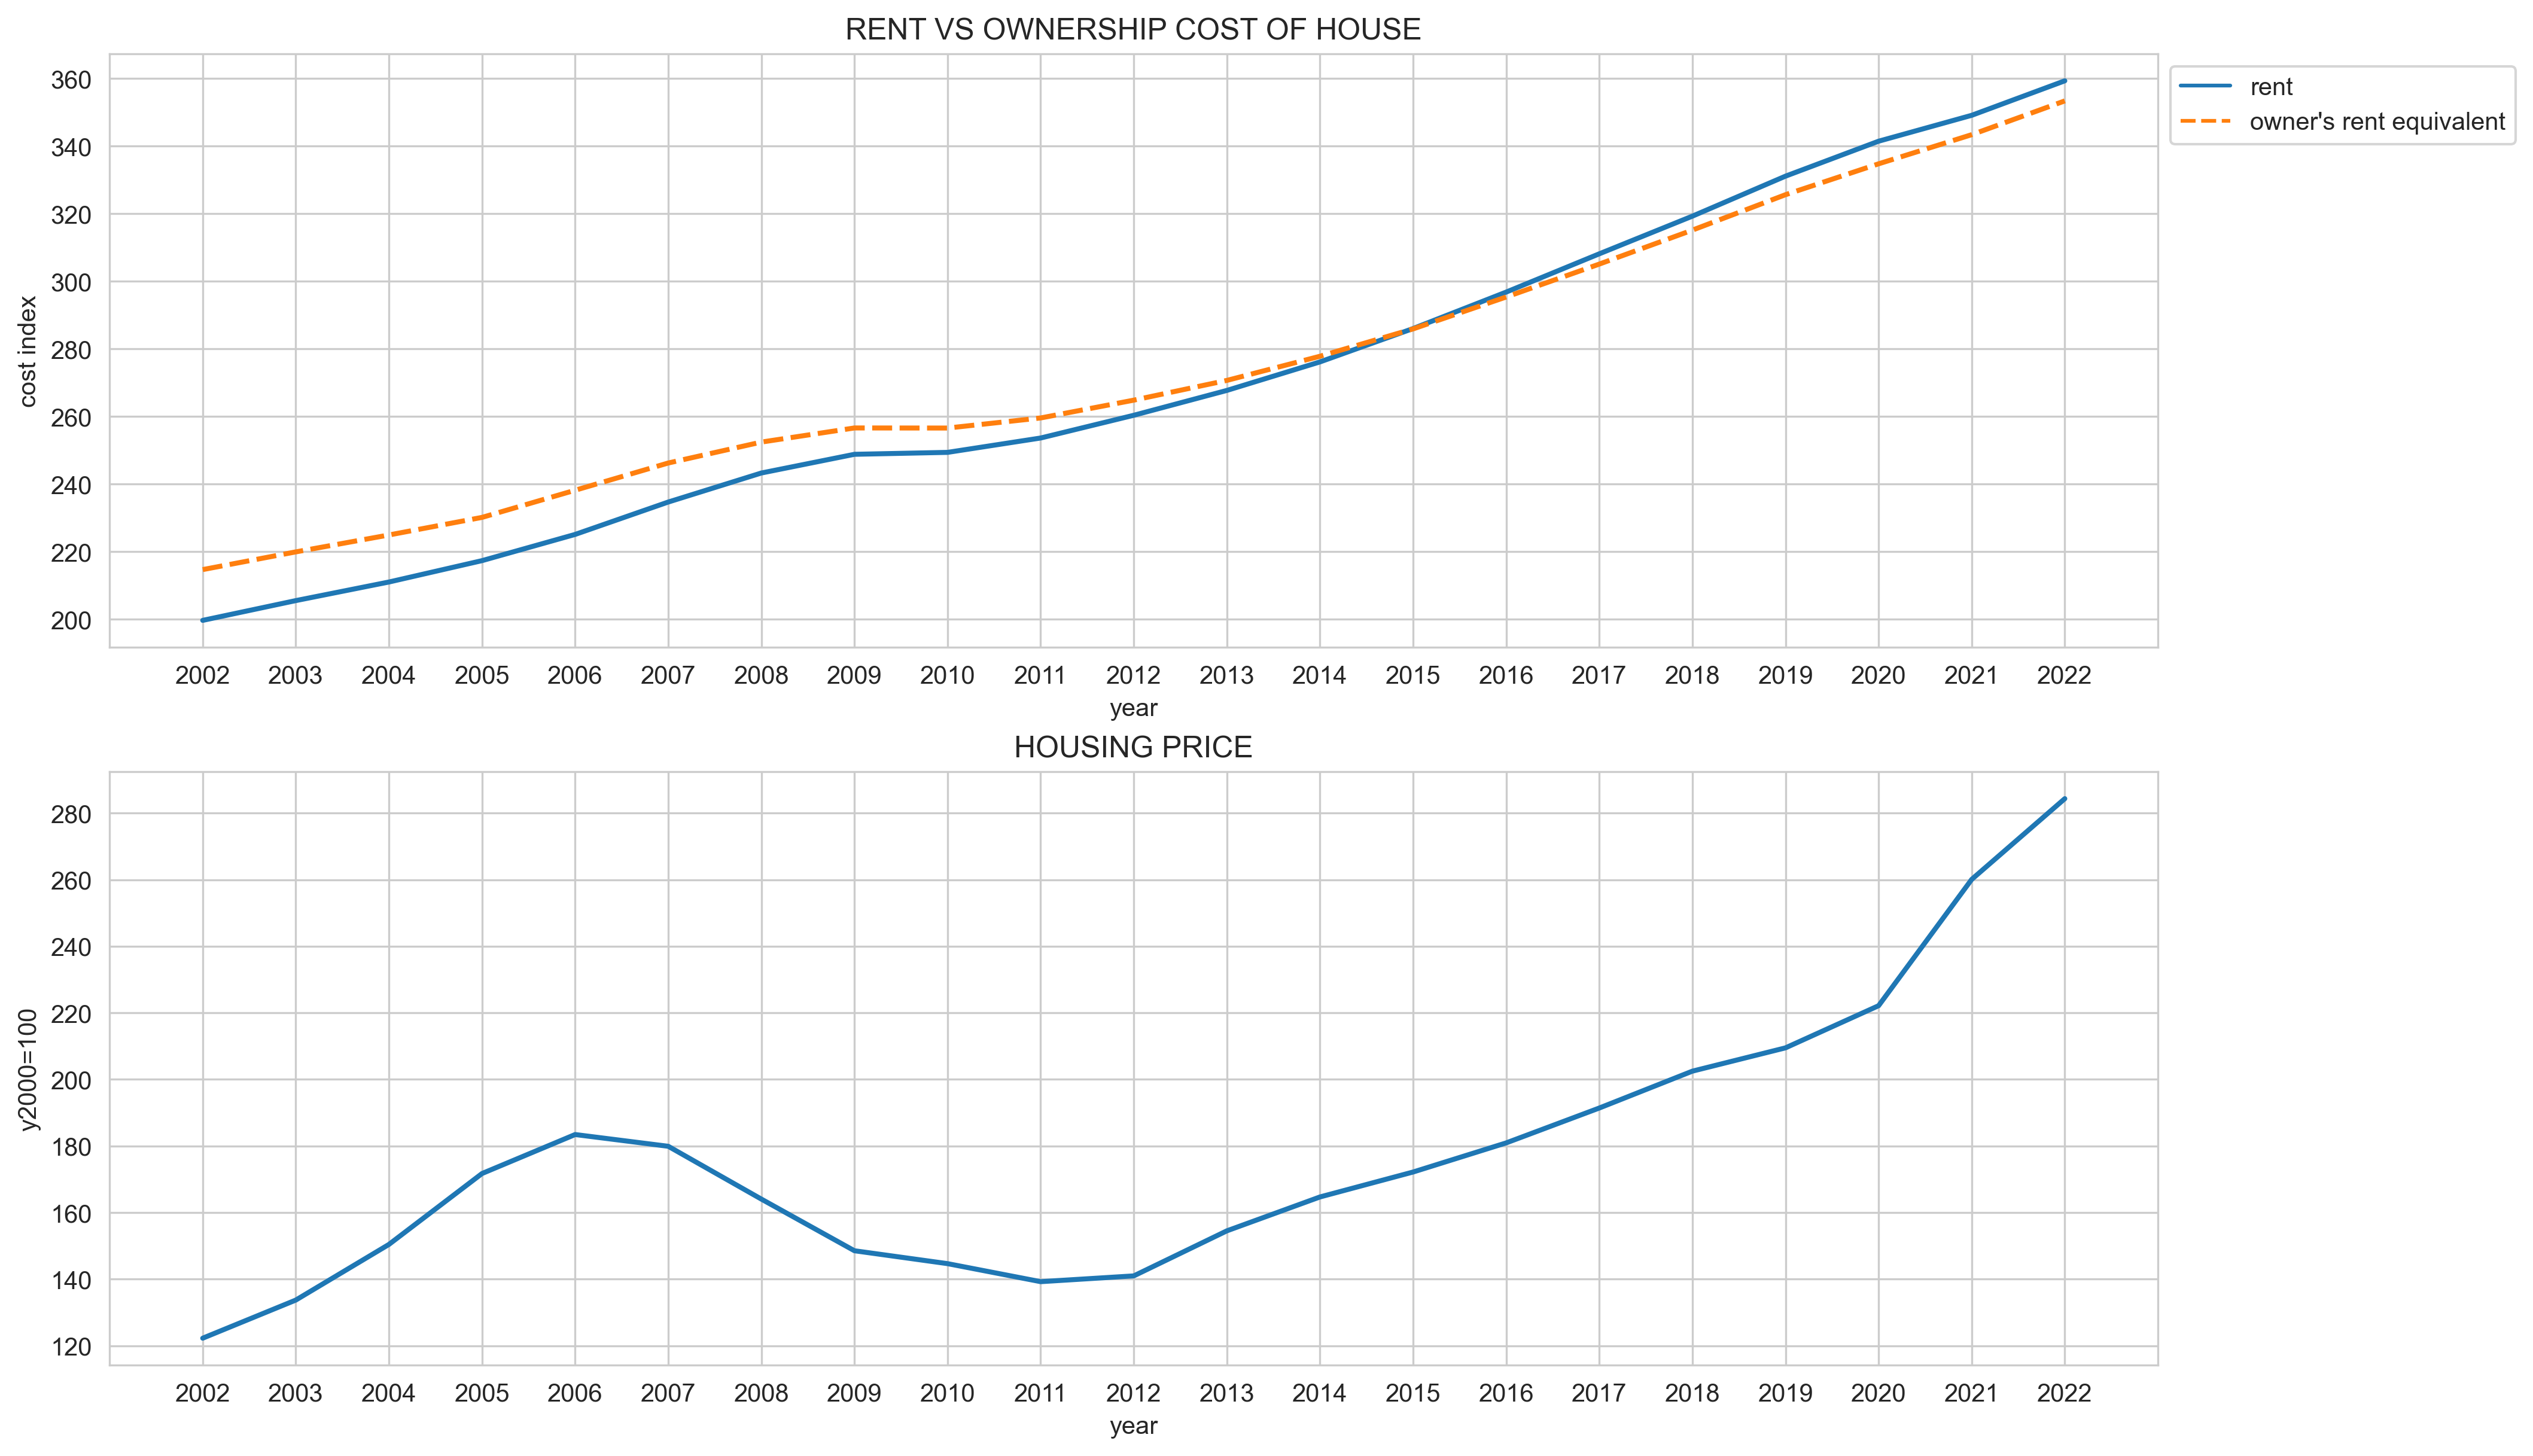

In [774]:
figure,ax = plt.subplots(2,1,constrained_layout=True,figsize=(14,8),dpi=300) 

#economy_rent: 
sb.lineplot(ax= ax[0],data = df_economy_rent,
            linewidth = 2)
ax[0].set(xlabel="year", ylabel = "cost index")
ax[0].set_title("RENT VS OWNERSHIP COST OF HOUSE")
ax[0].set_xticks(np.arange(2002, 2023, 1.0))
ax[0].legend(loc='best', bbox_to_anchor=(1, 1))

#housing prices
sb.lineplot(ax=ax[1],data = housing_prices, x="year", y="median housing price", linewidth = 2)
ax[1].set_title("HOUSING PRICE")
ax[1].set(xlabel="year", ylabel = "y2000=100")
ax[1].set_xticks(np.arange(2002, 2023, 1.0)) 


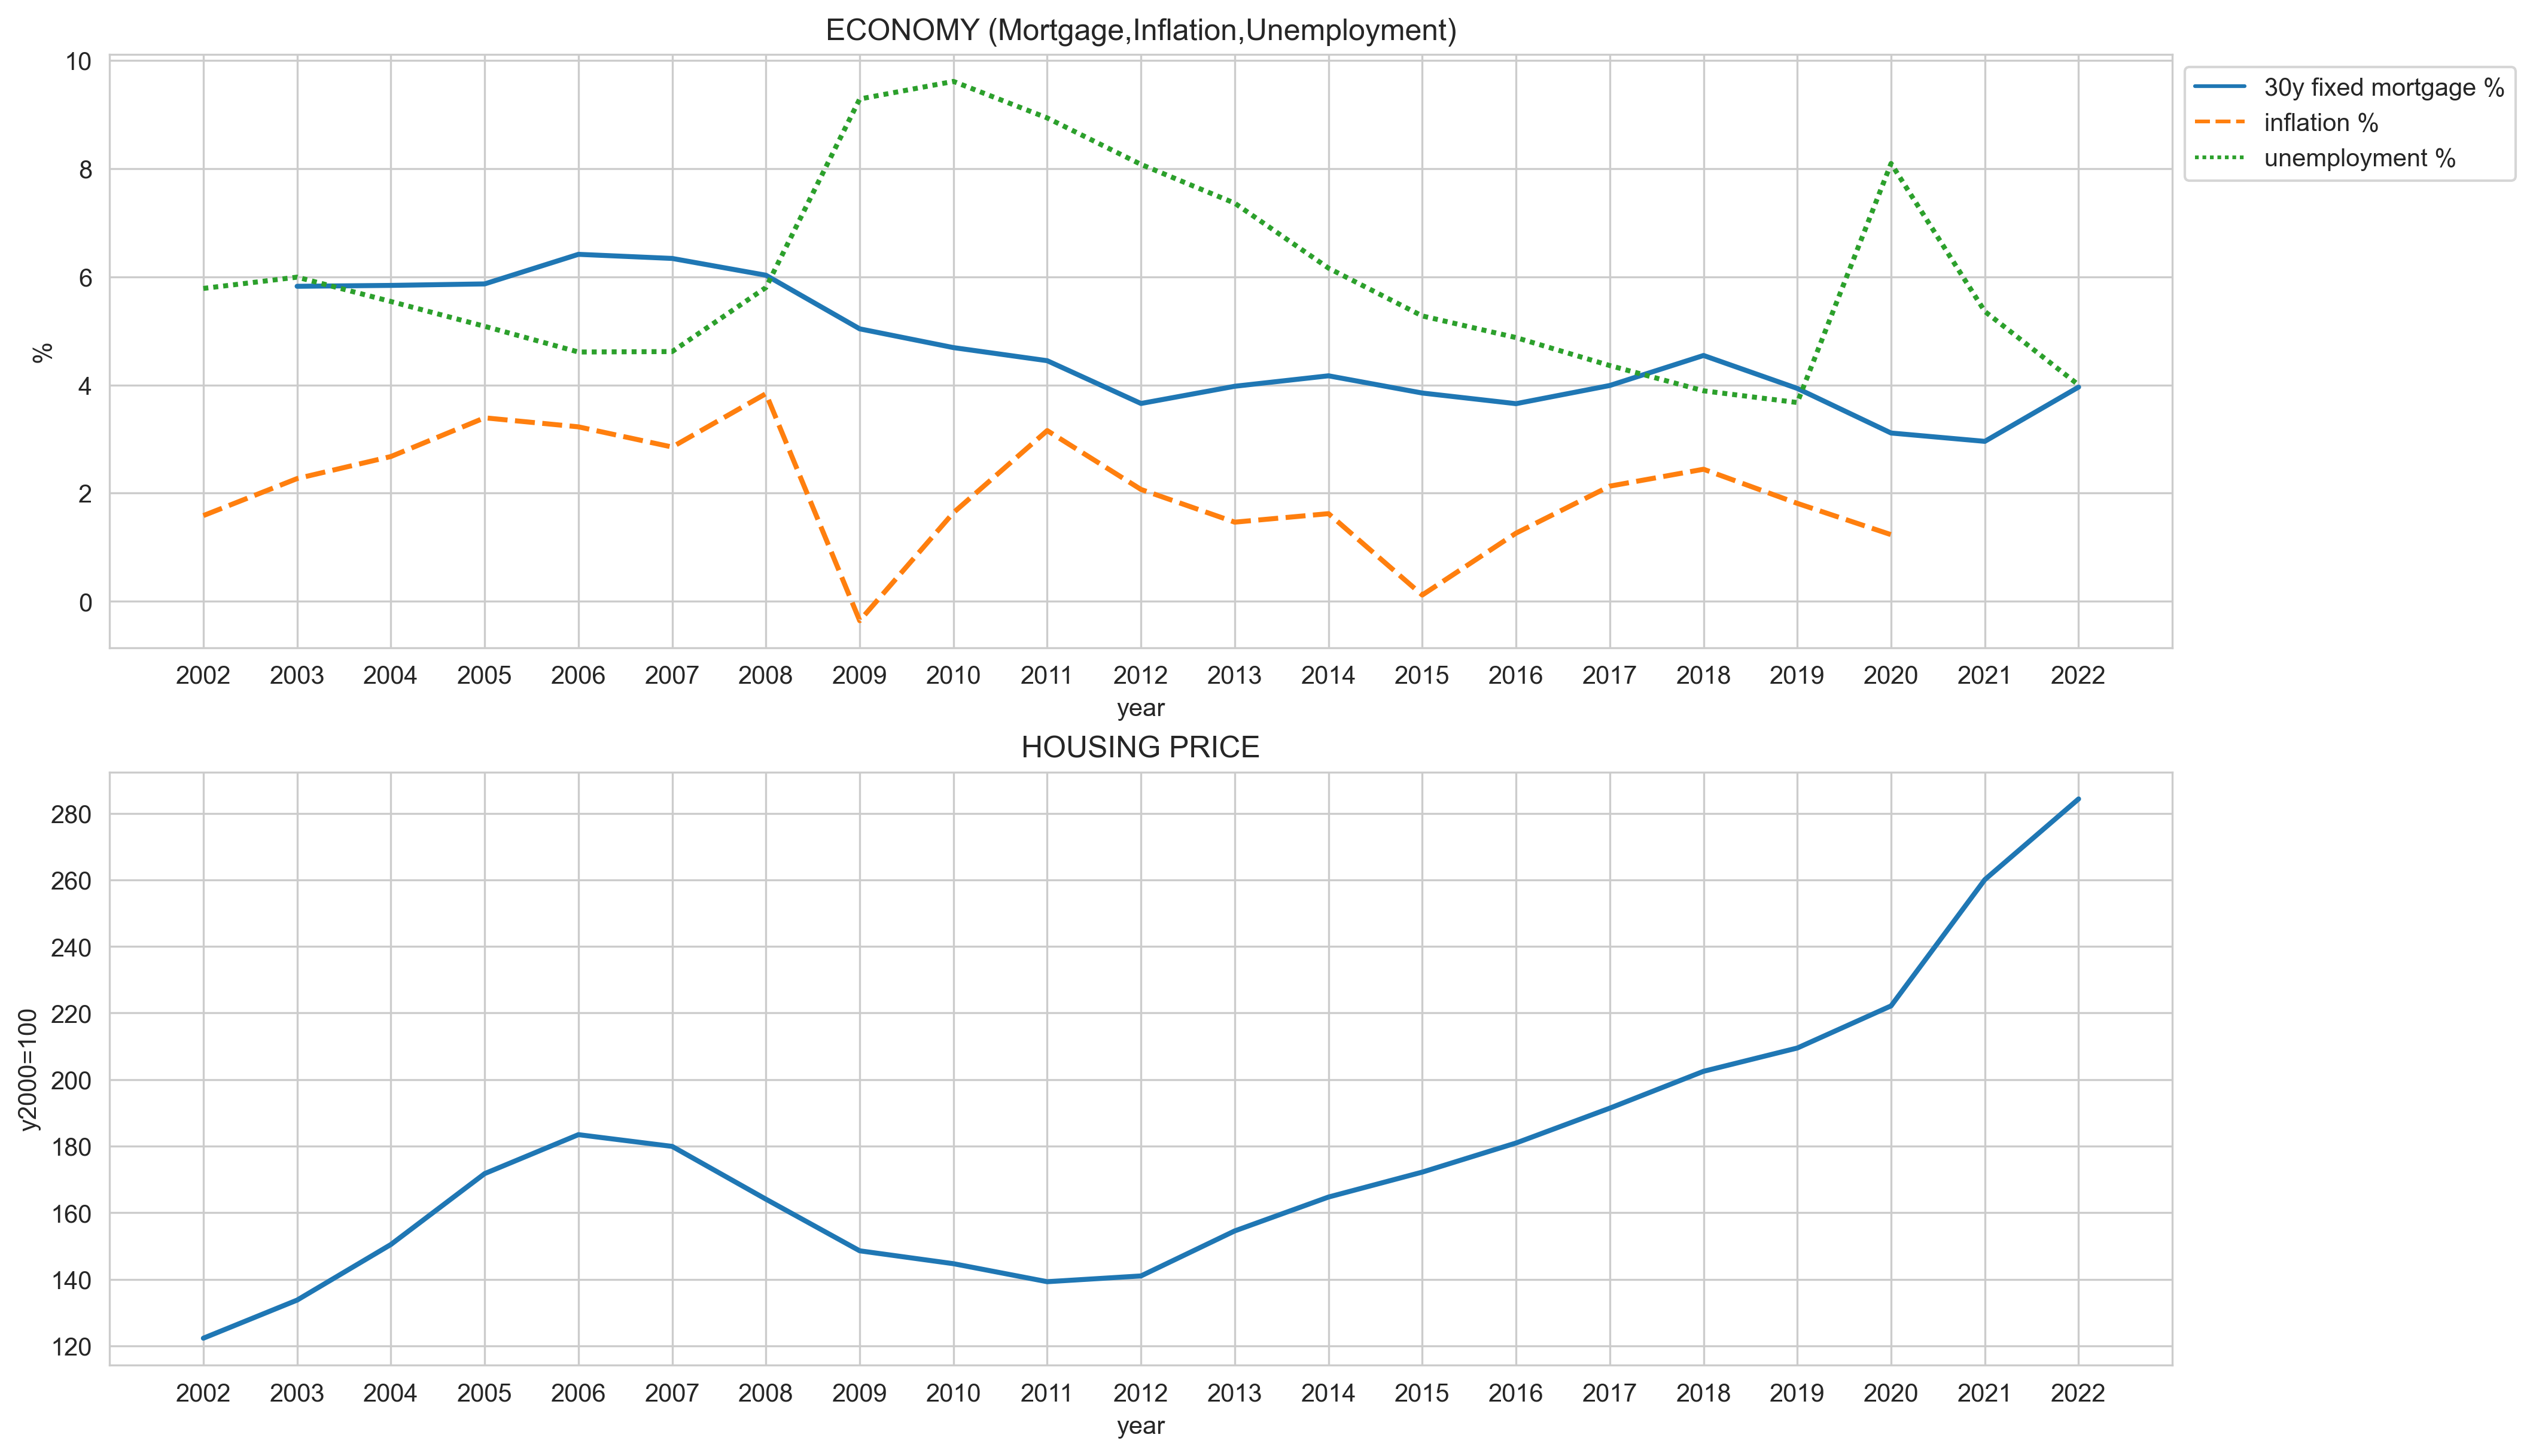

In [775]:
figure,ax = plt.subplots(2,1,constrained_layout=True,figsize=(14,8),dpi=300) 

#economy_rent: 
sb.lineplot(ax= ax[0],data = df_economy_rates,
            linewidth = 2)
ax[0].set(xlabel="year", ylabel = "%")
ax[0].set_title("ECONOMY (Mortgage,Inflation,Unemployment)")
ax[0].set_xticks(np.arange(2002, 2023, 1.0))
ax[0].legend(loc='best', bbox_to_anchor=(1, 1))

#housing prices
sb.lineplot(ax=ax[1],data = housing_prices, x="year", y="median housing price", linewidth = 2)
ax[1].set_title("HOUSING PRICE")
ax[1].set(xlabel="year", ylabel = "y2000=100")
ax[1].set_xticks(np.arange(2002, 2023, 1.0)) 


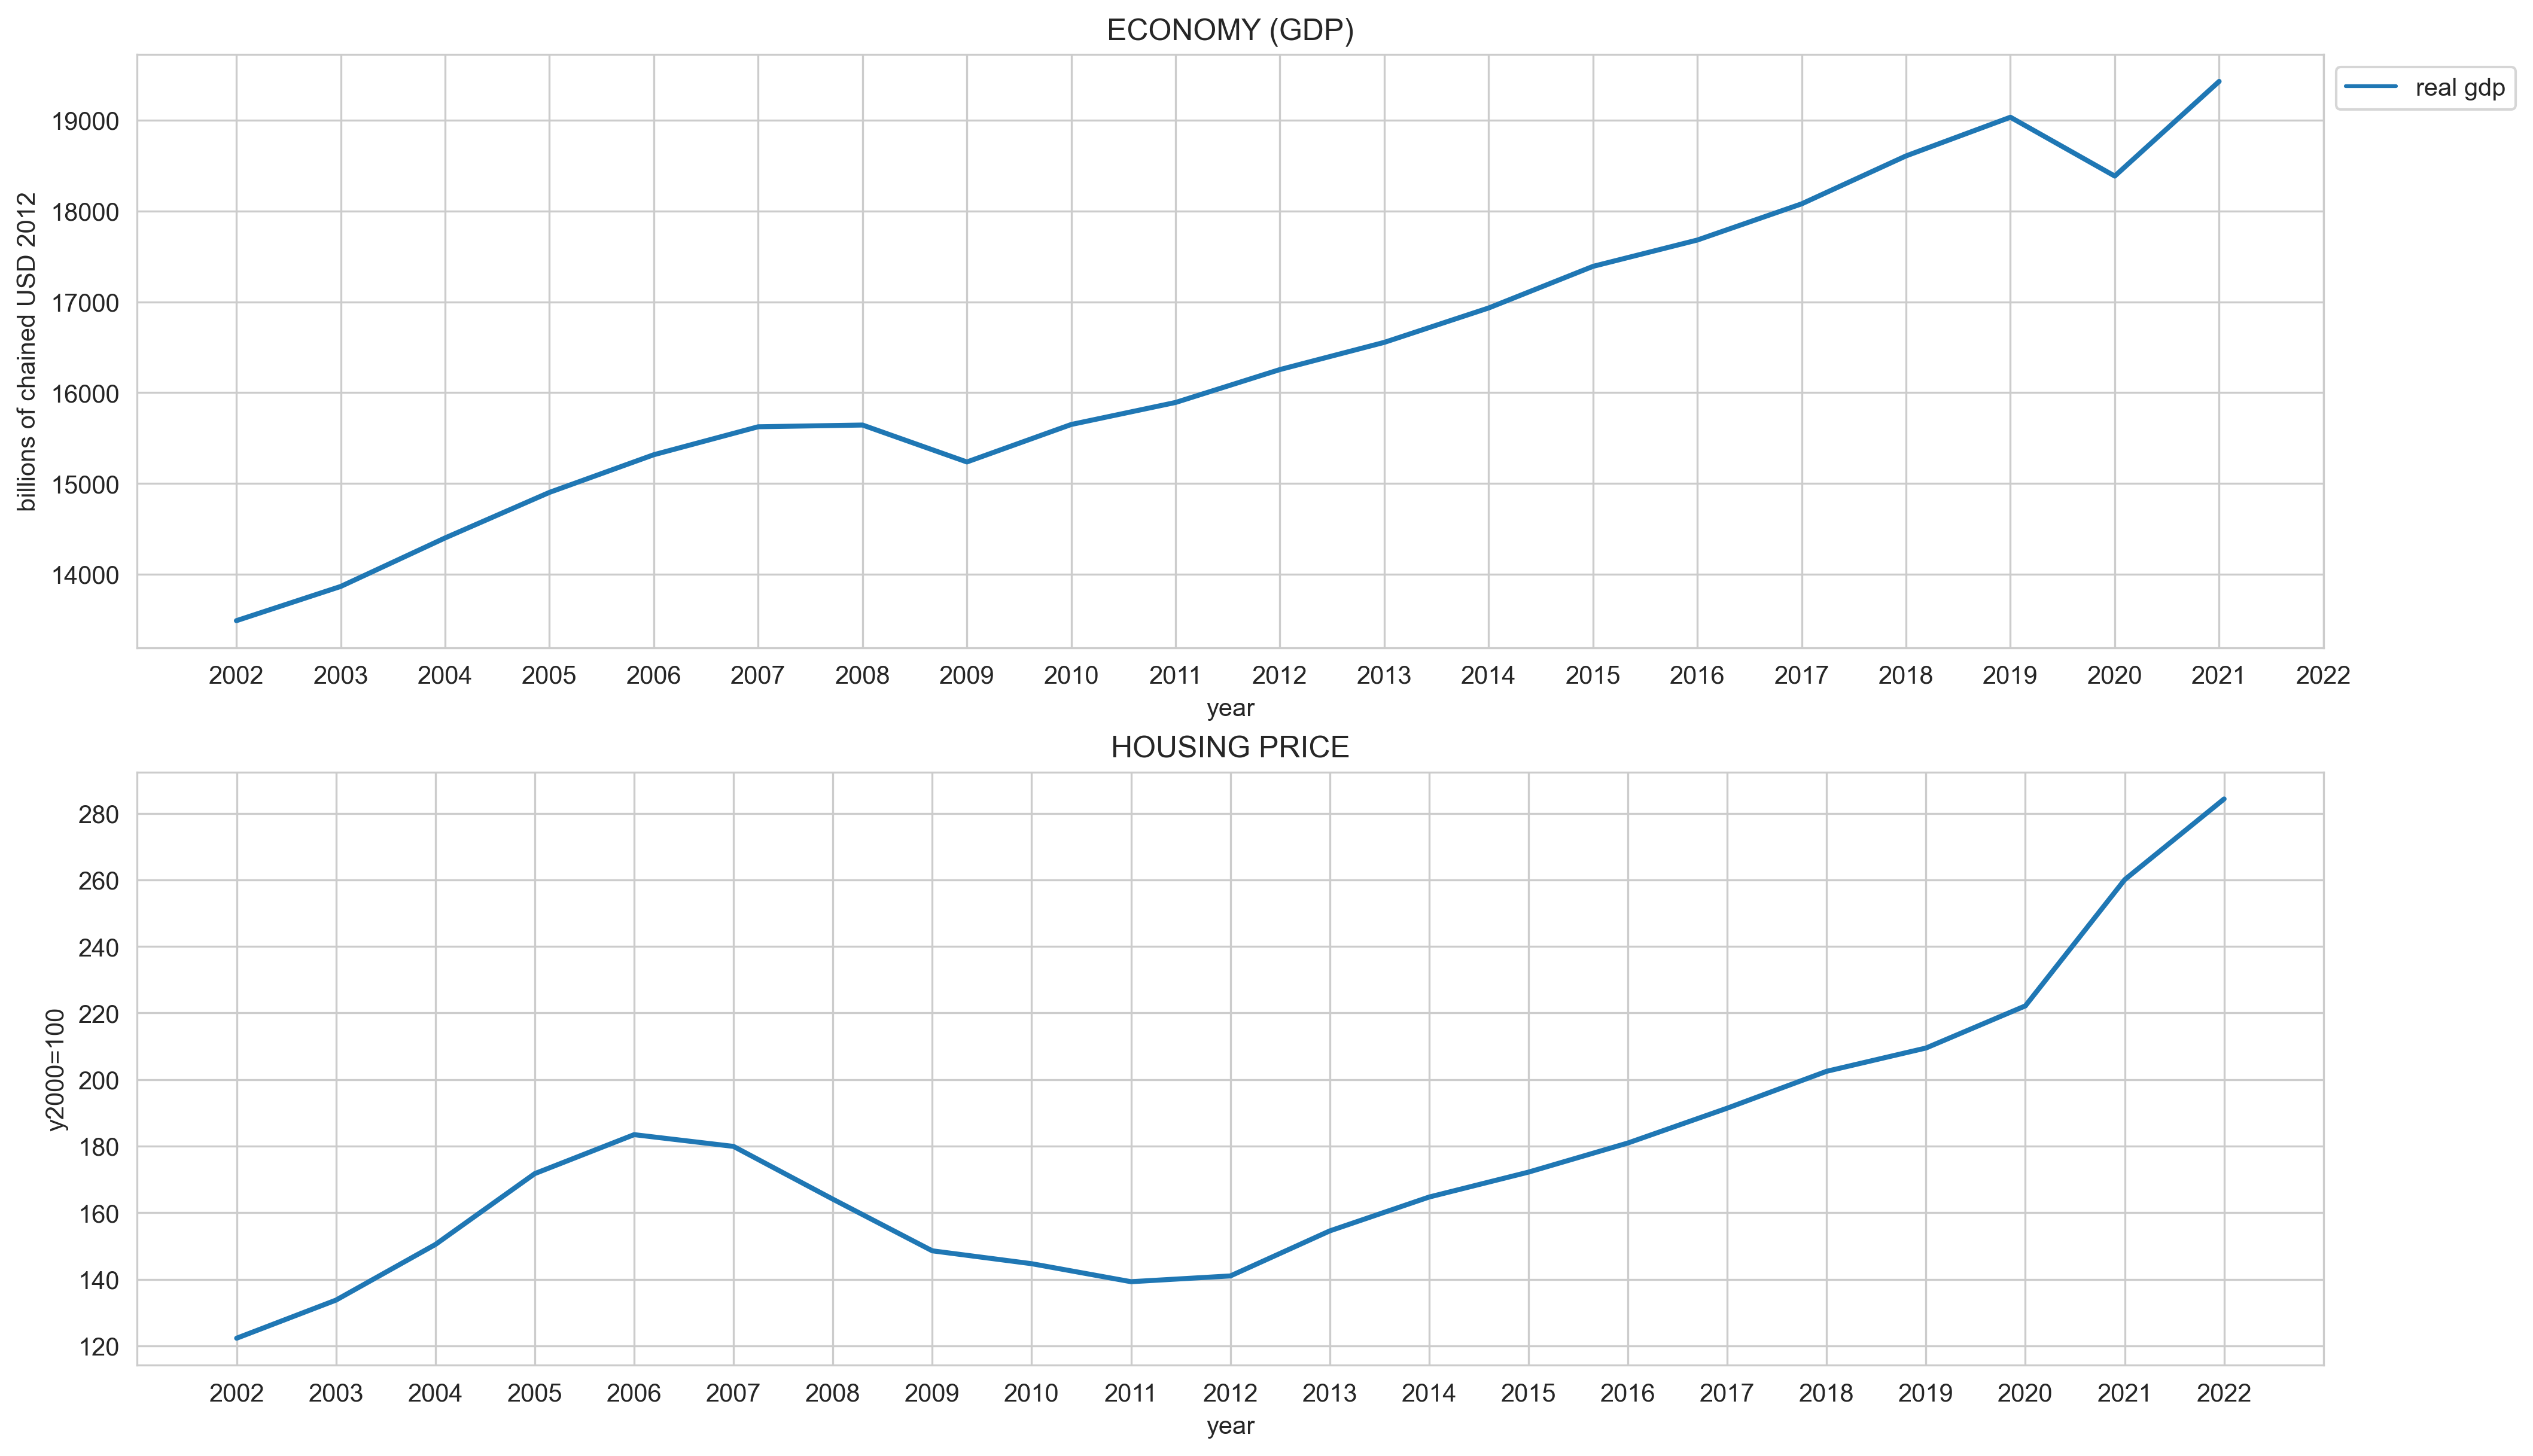

In [785]:
figure,ax = plt.subplots(2,1,constrained_layout=True,figsize=(14,8),dpi=300) 

#economy_rent: 
sb.lineplot(ax= ax[0],data = df_eco_gdp,
            linewidth = 2)
ax[0].set(xlabel="year", ylabel = "billions of chained USD 2012")
ax[0].set_title("ECONOMY (GDP)")
ax[0].set_xticks(np.arange(2002, 2023, 1.0))
ax[0].legend(loc='best', bbox_to_anchor=(1, 1))

#housing prices
sb.lineplot(ax=ax[1],data = housing_prices, x="year", y="median housing price", linewidth = 2)
ax[1].set_title("HOUSING PRICE")
ax[1].set(xlabel="year", ylabel = "y2000=100")
ax[1].set_xticks(np.arange(2002, 2023, 1.0)) 


## 2. DEMOGRAPHICS - HOUSEHOLD

### *Data availability : 2008-2012*

### 2.1 INCOME 

### LOAD DATA

In [790]:
#source: CENSUSACS: ACS PUMS: https://data.census.gov/mdat/#/

hh_inc_list = []
for i in range(2008,2020):
    globals()["hh_inc_%s" % i] = pd.read_html("Data/Demand/Demo/Buyer/income/"+str(i)+".html")[0]
    hh_inc_list.append(globals()["hh_inc_%s" % i])

### CLEAN DATA

In [791]:
columns_hh_inc = ['<50,000','50,001-100,000','100,001-150,000','150,001-200,000','200,001-500,000','>500,000']
df_demo_hh_inc = pd.DataFrame(index=range(2008,2020,1), columns = columns_hh_inc)
df_demo_hh_inc.index.rename('year', inplace=True)

In [792]:
for item in hh_inc_list:
    cleanupIncome(item)

In [793]:
for i in range(0,12):
    df_demo_hh_inc.iloc[i,:] = hh_inc_list[i].iloc[1]

In [794]:
df_demo_hh_inc = df_demo_hh_inc.astype(float)

In [795]:
df_demo_hh_inc

<50,000  50,001-100,000  100,001-150,000  150,001-200,000  \
year                                                                
2008  1586586.0       1682551.0         613997.0         219877.0   
2009  1369993.0       1375313.0         551160.0         194925.0   
2010  1391802.0       1329459.0         533419.0         177024.0   
2011  1252841.0       1180014.0         488612.0         191240.0   
2012  1269922.0       1231884.0         512552.0         207367.0   
2013  1318973.0       1302084.0         602408.0         254910.0   
2014  1271413.0       1369577.0         692825.0         280154.0   
2015  1300464.0       1500206.0         765502.0         333471.0   
2016  1348119.0       1601850.0         865475.0         364247.0   
2017  1350681.0       1750044.0         958062.0         414165.0   
2018  1340211.0       1702021.0         979609.0         442987.0   
2019  1216360.0       1677332.0        1009241.0         489835.0   

      200,001-500,000  >500,000  
year                             
2008         225819.0   30758.0  
2009         190465.0   21442.0  
2010         185289.0   15683.0  
2011         202934.0   16374.0  
2012         223129.0   22485.0  
2013         269201.0   30954.0  
2014         315249.0   41125.0  
2015         353151.0   52393.0  
2016         389122.0   61157.0  
2017         449957.0   65115.0  
2018         474925.0   86939.0  
2019         526242.0   89982.0

### VISUALISE

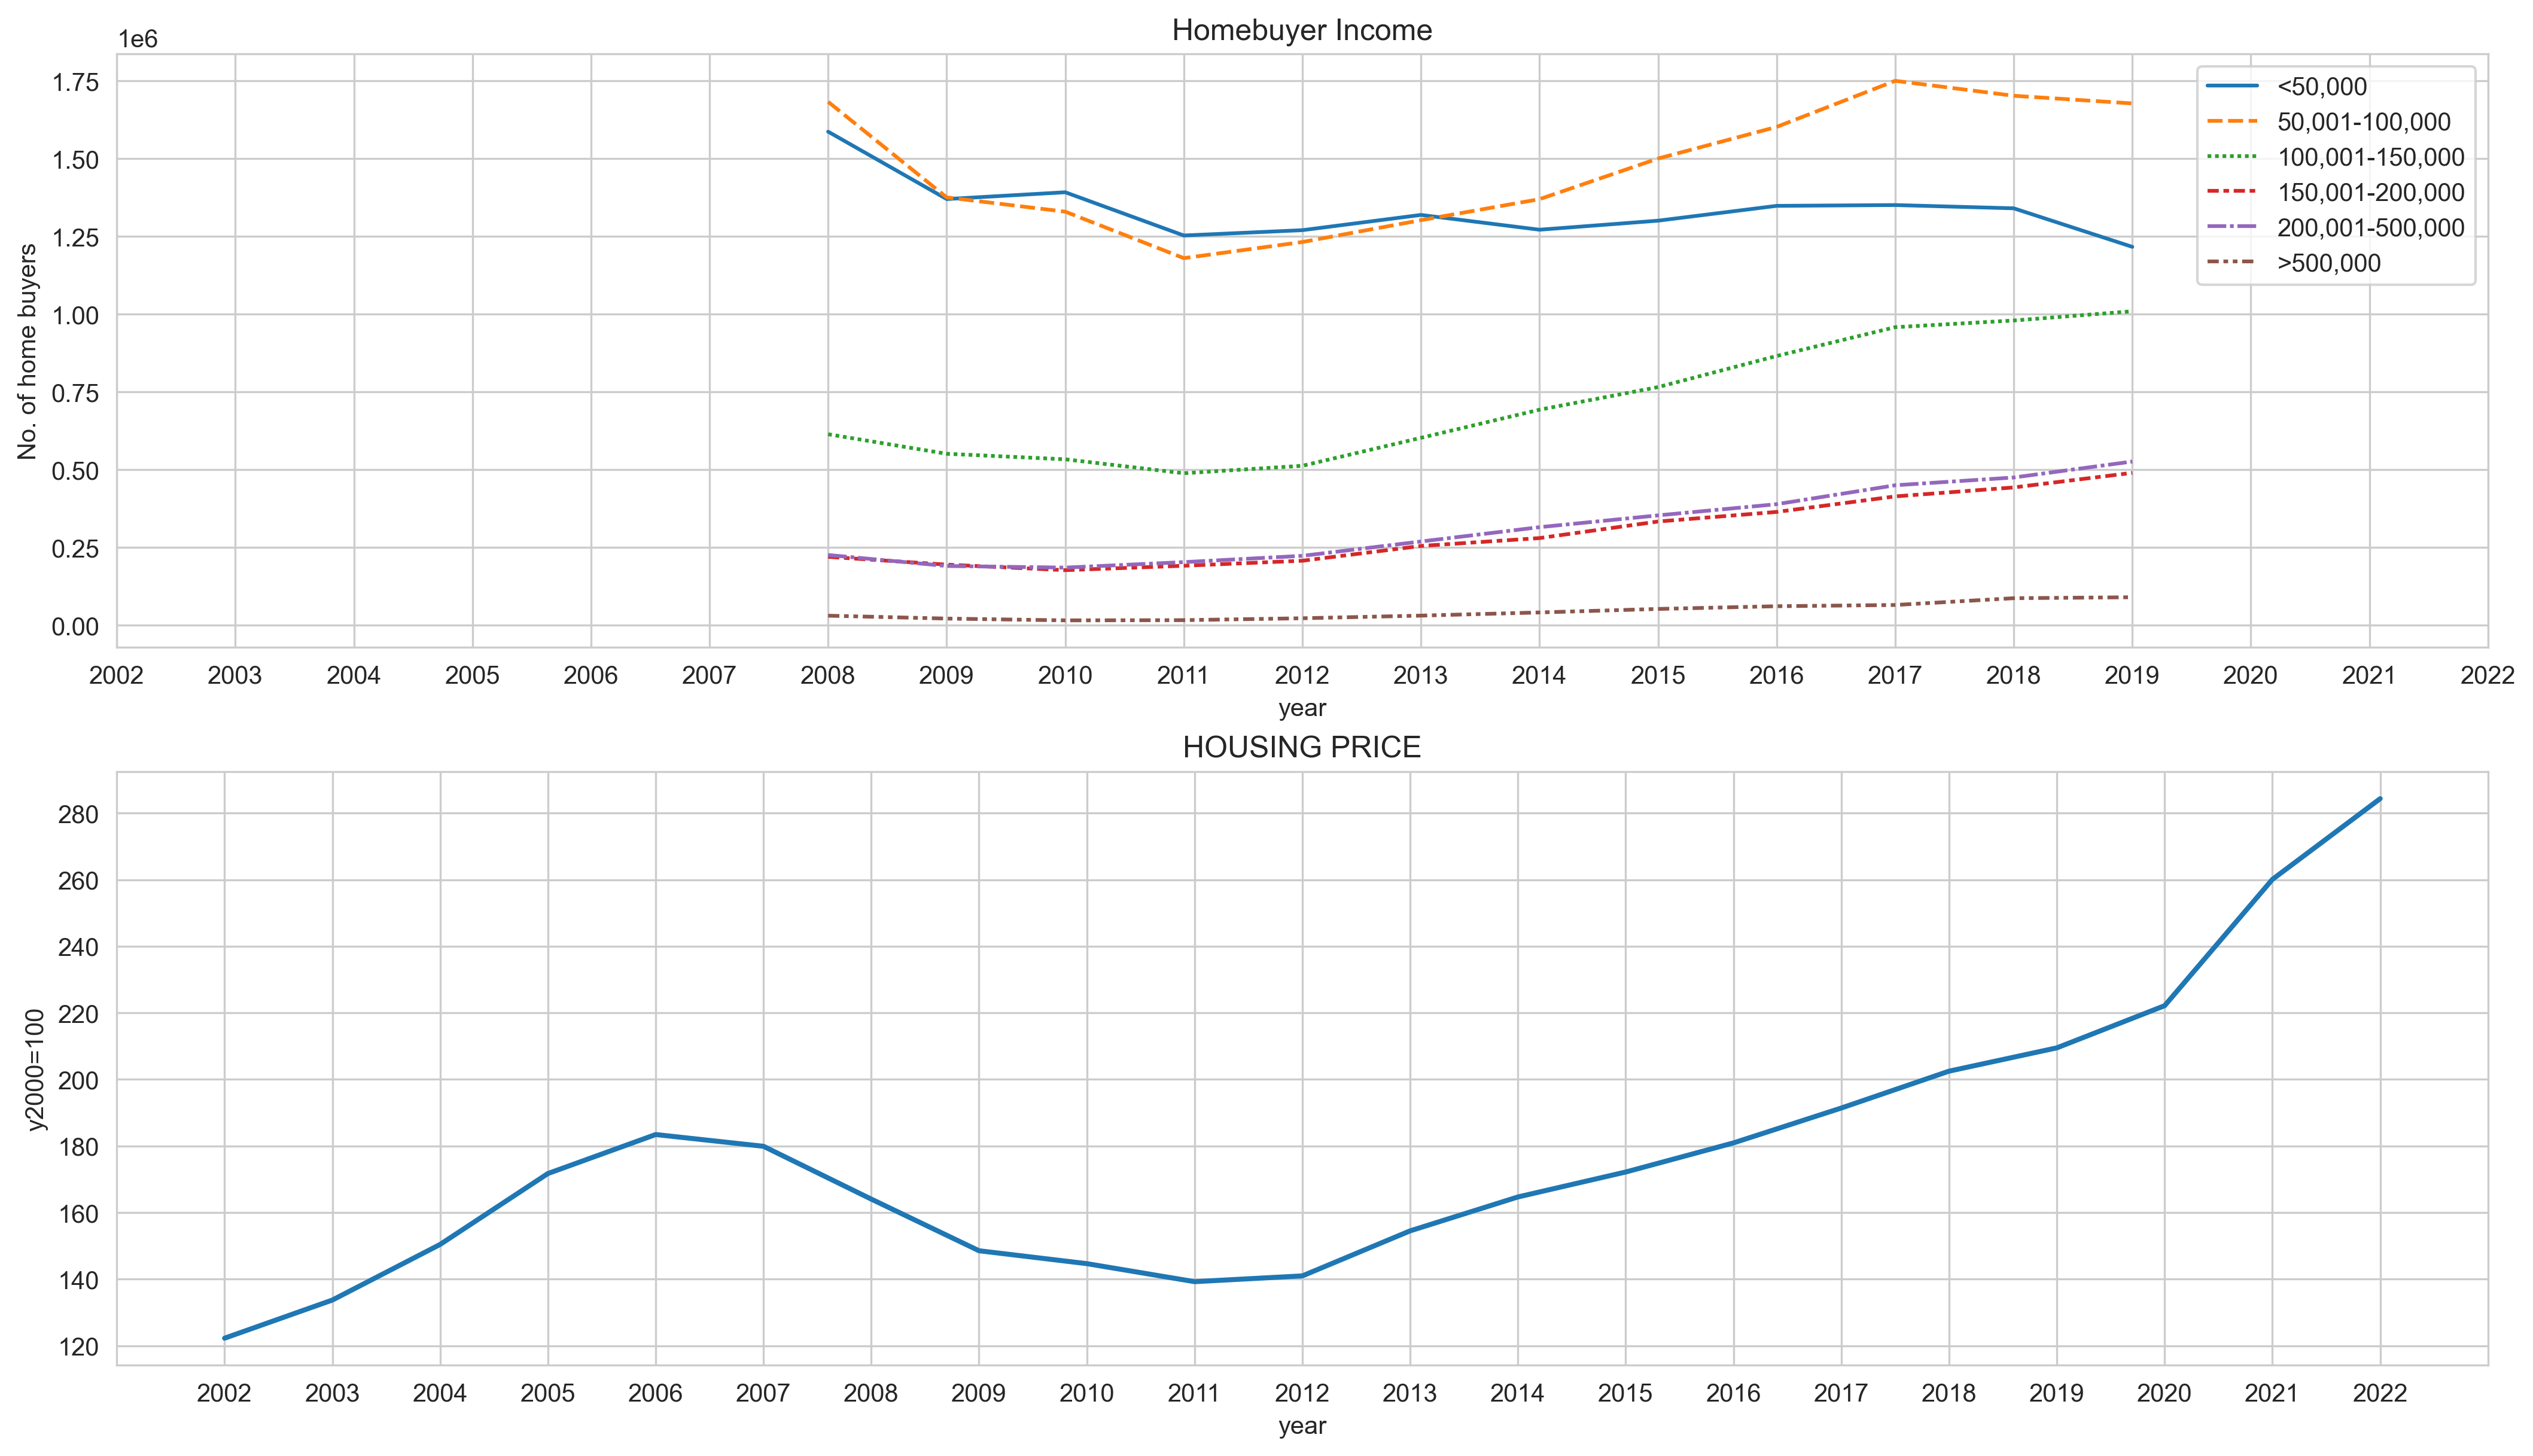

In [796]:
figure,ax = plt.subplots(2,1,constrained_layout=True,figsize=(14,8),dpi=300) 

#buyer_demographic_household_income: 
sb.lineplot(ax= ax[0],data = df_demo_hh_inc)
ax[0].set(xlabel="year", ylabel = "No. of home buyers")
ax[0].set_title("Homebuyer Income")
ax[0].set_xticks(np.arange(2002, 2023, 1.0))
ax[0].legend(loc='best', bbox_to_anchor=(1, 1))

#housing prices
sb.lineplot(ax=ax[1],data = housing_prices, x="year", y="median housing price", linewidth = 2)
ax[1].set_title("HOUSING PRICE")
ax[1].set(xlabel="year", ylabel = "y2000=100")
ax[1].set_xticks(np.arange(2002, 2023, 1.0)) 


### 2.2 EDUCATION 

### LOAD DATA

In [797]:
hh_edu_list = []
for i in range(2008,2020):
    globals()["hh_edu_%s" % i] = pd.read_html("Data/Demand/Demo/Buyer/education/"+str(i)+".html")[0]
    hh_edu_list.append(globals()["hh_edu_%s" % i])

### CLEAN DATA

In [798]:
columns_hh_edu = ['Less than HighSchool','High School/GED',"Associate's deg","Bachelor's deg",
                  "Doctorate","Master's/Professional"]
df_demo_hh_edu = pd.DataFrame(index=range(2008,2020,1), columns = columns_hh_edu)
df_demo_hh_edu.index.rename('year', inplace=True)

In [799]:
for item in hh_edu_list:
    cleanupEdu(item)

In [800]:
for i in range(0,12):
    df_demo_hh_edu.iloc[i,:] = hh_edu_list[i].iloc[1]

In [801]:
df_demo_hh_edu = df_demo_hh_edu.astype(float)

In [802]:
df_demo_hh_edu

Less than HighSchool  High School/GED  Associate's deg  Bachelor's deg  \
year                                                                           
2008             3378861.0        1888760.0         715286.0       1870723.0   
2009             2760182.0        1581912.0         609108.0       1641047.0   
2010             2606062.0        1500487.0         588002.0       1651490.0   
2011             2525082.0        1412344.0         538212.0       1482568.0   
2012             2587545.0        1454005.0         574294.0       1582611.0   
2013             2839022.0        1529502.0         659584.0       1763113.0   
2014             2824550.0        1574518.0         688833.0       1920183.0   
2015             3088150.0        1724164.0         757459.0       2107935.0   
2016             3326450.0        1857134.0         834047.0       2278276.0   
2017             3575501.0        1982403.0         890690.0       2480290.0   
2018             3543240.0        2043102.0         939028.0       2499275.0   
2019             3515571.0        2005228.0         927792.0       2515415.0   

      Doctorate  Master's/Professional  
year                                    
2008   126084.0               930229.0  
2009   111831.0               833709.0  
2010   119560.0               830017.0  
2011   111436.0               789527.0  
2012   120380.0               831510.0  
2013   141410.0               968443.0  
2014   155093.0              1083541.0  
2015   168209.0              1176410.0  
2016   170189.0              1285130.0  
2017   188476.0              1423229.0  
2018   196462.0              1432822.0  
2019   198226.0              1416212.0

### VISUALISE

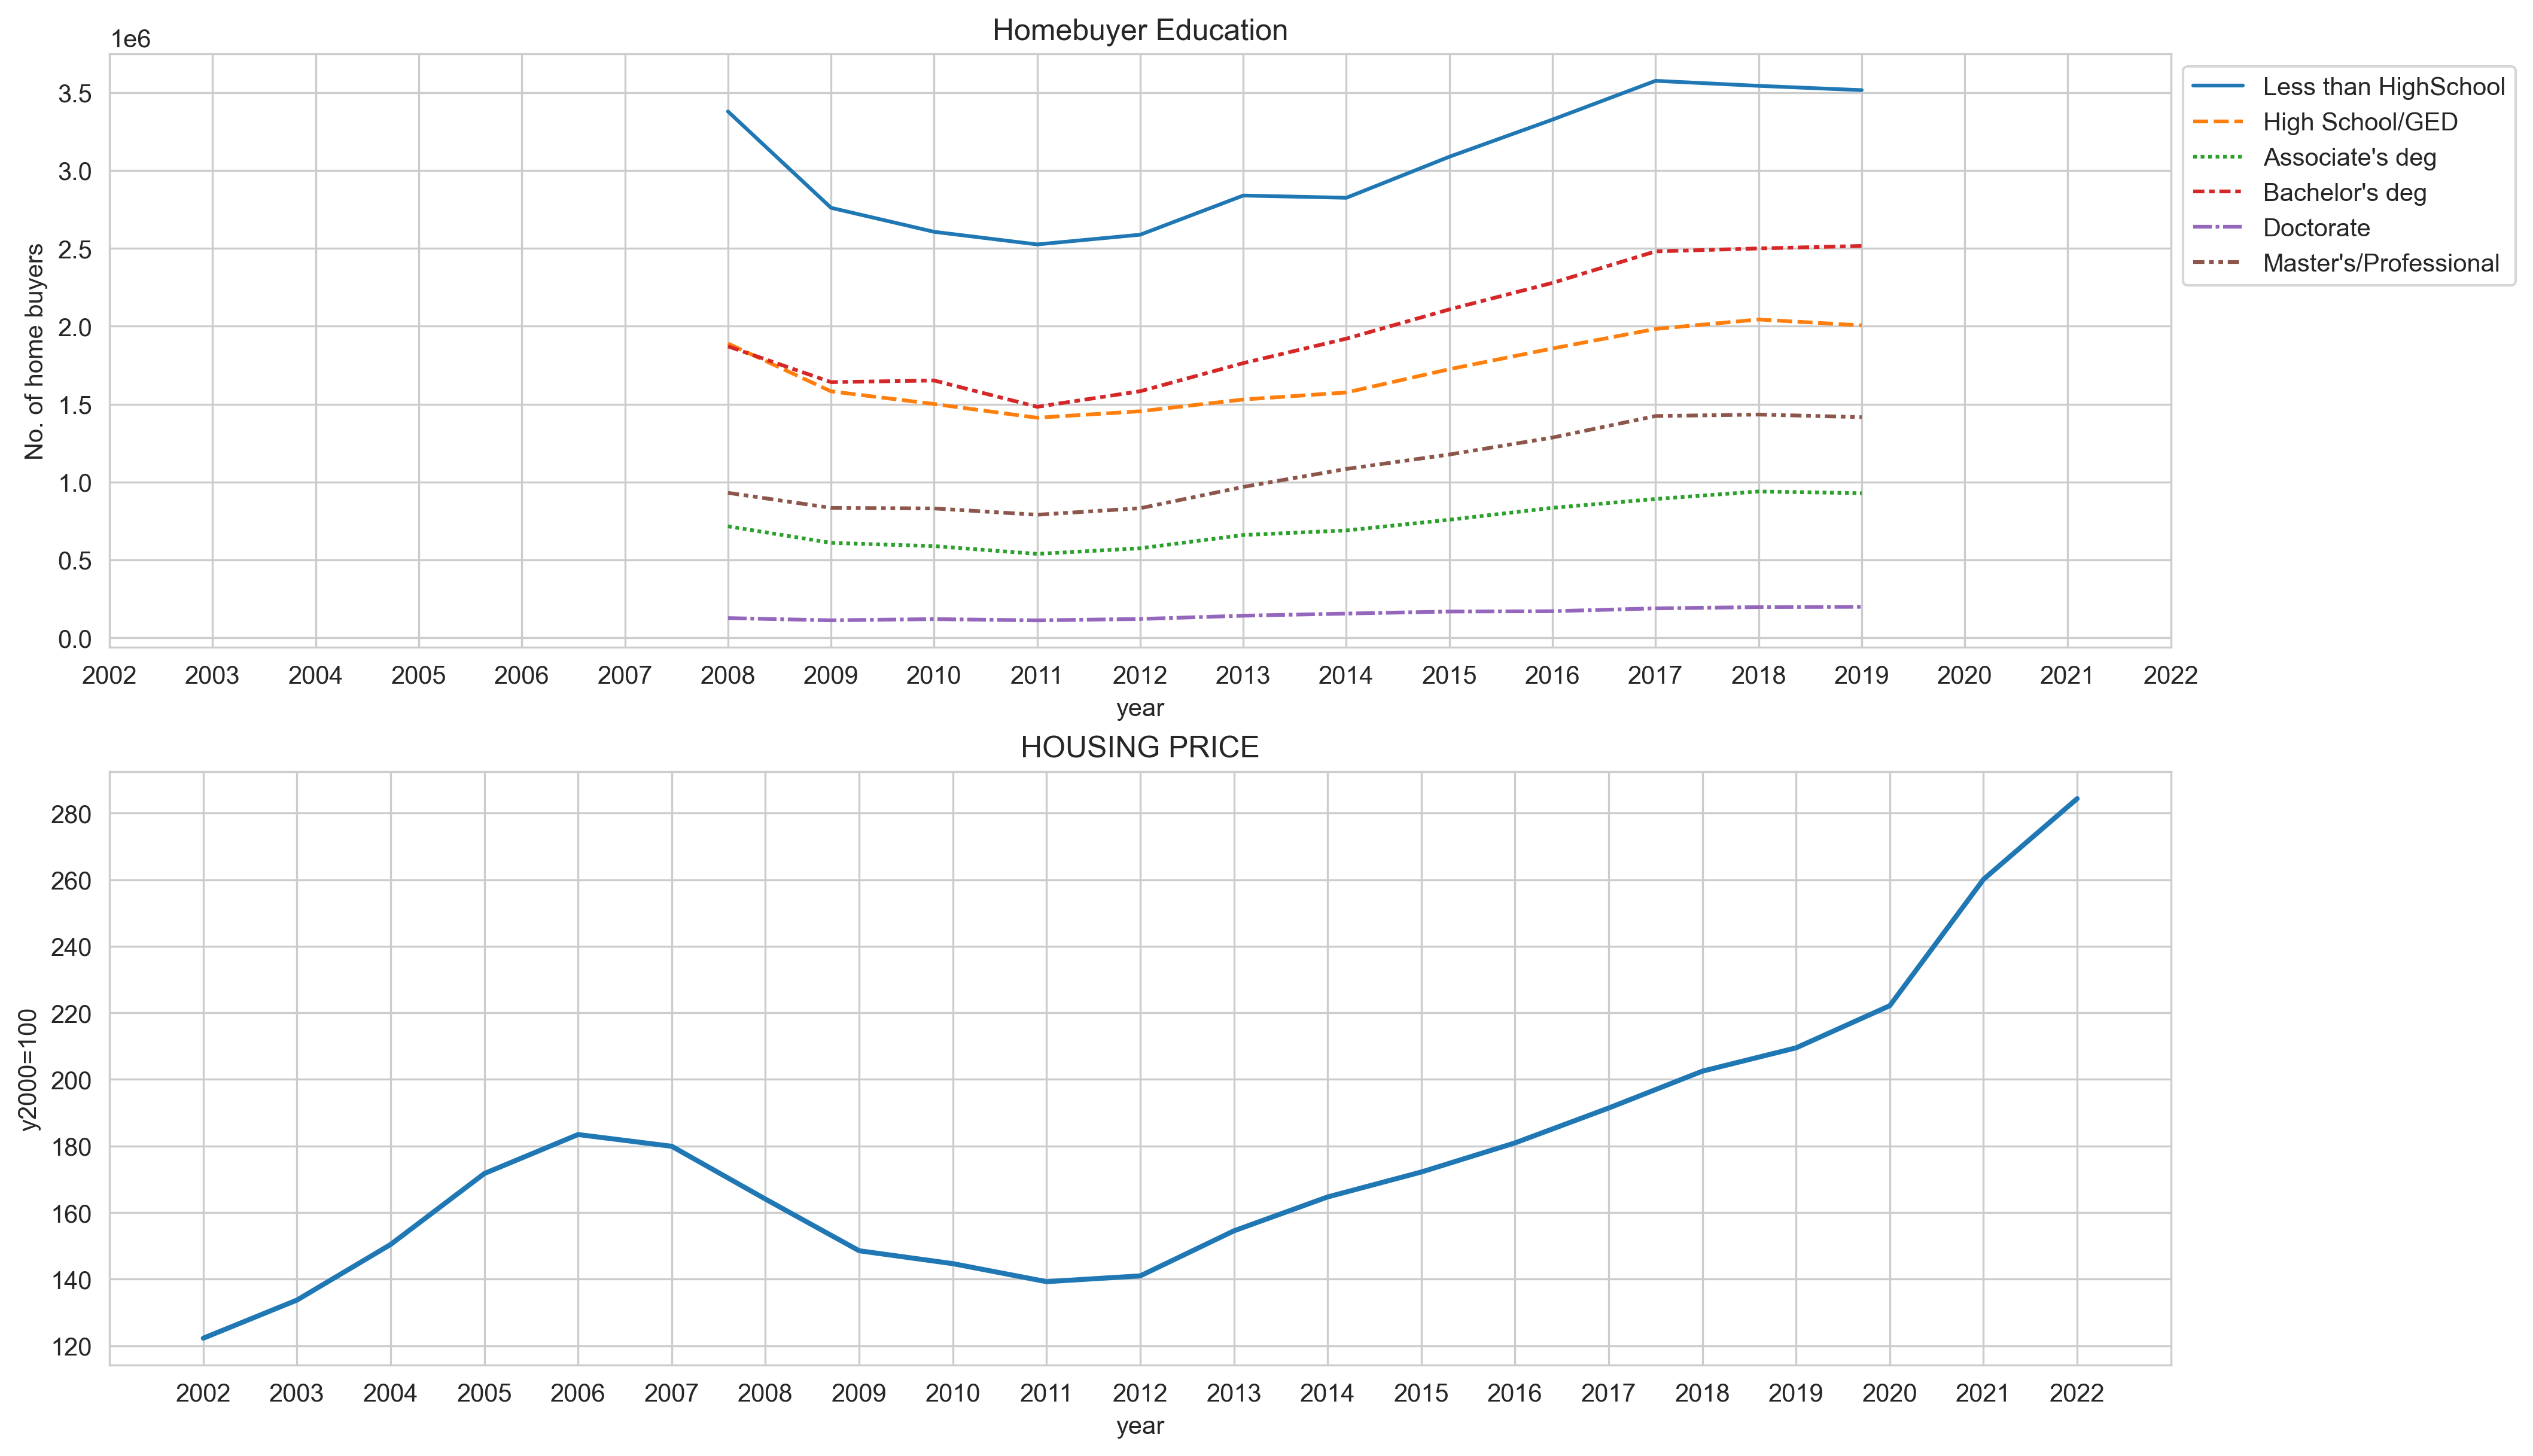

In [803]:
figure,ax = plt.subplots(2,1,constrained_layout=True,figsize=(14,8),dpi=300) 

#buyer_demographic_household_education: 
sb.lineplot(ax= ax[0],data = df_demo_hh_edu)
ax[0].set(xlabel="year", ylabel = "No. of home buyers")
ax[0].set_title("Homebuyer Education")
ax[0].set_xticks(np.arange(2002, 2023, 1.0))
ax[0].legend(loc='best', bbox_to_anchor=(1, 1))

#housing prices
sb.lineplot(ax=ax[1],data = housing_prices, x="year", y="median housing price", linewidth = 2)
ax[1].set_title("HOUSING PRICE")
ax[1].set(xlabel="year", ylabel = "y2000=100")
ax[1].set_xticks(np.arange(2002, 2023, 1.0)) 


### 2.3 FAMILY TYPE

### LOAD DATA:

In [805]:
hh_fam_list = []
for i in range(2008,2020):
    globals()["hh_fam_%s" % i] = pd.read_html("Data/Demand/Demo/Buyer/family type/"+str(i)+".html")[0]
    hh_fam_list.append(globals()["hh_fam_%s" % i])

### CLEAN DATA:

In [806]:
columns_hh_fam= ["married couple", "male householder no spouse","female householder no spouse",
                 "male householder living alone","female householder living alone",
                 "male householder not living alone","female householder not living alone"]
df_demo_hh_fam = pd.DataFrame(index=range(2008,2020,1), columns = columns_hh_fam)
df_demo_hh_fam.index.rename('year', inplace=True)

In [807]:
for item in hh_fam_list:
    cleanupFam(item)

In [808]:
for i in range(0,12):
    df_demo_hh_fam.iloc[i,:] = hh_fam_list[i].iloc[1]

In [809]:
df_demo_hh_fam = df_demo_hh_fam.astype(float)

In [810]:
df_demo_hh_fam

married couple  male householder no spouse  \
year                                               
2008       2392104.0                    215063.0   
2009       2014090.0                    188100.0   
2010       1925505.0                    188186.0   
2011       1824638.0                    177654.0   
2012       1889012.0                    186221.0   
2013       2085683.0                    197581.0   
2014       2260838.0                    197340.0   
2015       2483323.0                    213395.0   
2016       2643212.0                    221433.0   
2017       2851403.0                    258357.0   
2018       2830086.0                    253425.0   
2019       2820357.0                    254641.0   

      female householder no spouse  male householder living alone  \
year                                                                
2008                      440059.0                       509690.0   
2009                      361357.0                       446107.0   
2010                      376944.0                       450633.0   
2011                      341714.0                       401622.0   
2012                      365762.0                       401870.0   
2013                      368132.0                       429951.0   
2014                      365071.0                       435211.0   
2015                      388986.0                       447192.0   
2016                      419482.0                       489109.0   
2017                      452832.0                       520970.0   
2018                      461229.0                       547031.0   
2019                      445595.0                       537202.0   

      female householder living alone  male householder not living alone  \
year                                                                       
2008                         213868.0                           477297.0   
2009                         200180.0                           391329.0   
2010                         193054.0                           398769.0   
2011                         161543.0                           350171.0   
2012                         174217.0                           364632.0   
2013                         191023.0                           414761.0   
2014                         191146.0                           429083.0   
2015                         210493.0                           458403.0   
2016                         231354.0                           503964.0   
2017                         243403.0                           540321.0   
2018                         256380.0                           546320.0   
2019                         259747.0                           547655.0   

      female householder not living alone  
year                                       
2008                             141478.0  
2009                             129703.0  
2010                             135324.0  
2011                             113572.0  
2012                             122677.0  
2013                             131903.0  
2014                             131393.0  
2015                             144035.0  
2016                             159079.0  
2017                             172670.0  
2018                             180292.0  
2019                             184885.0

### VISUALISE:

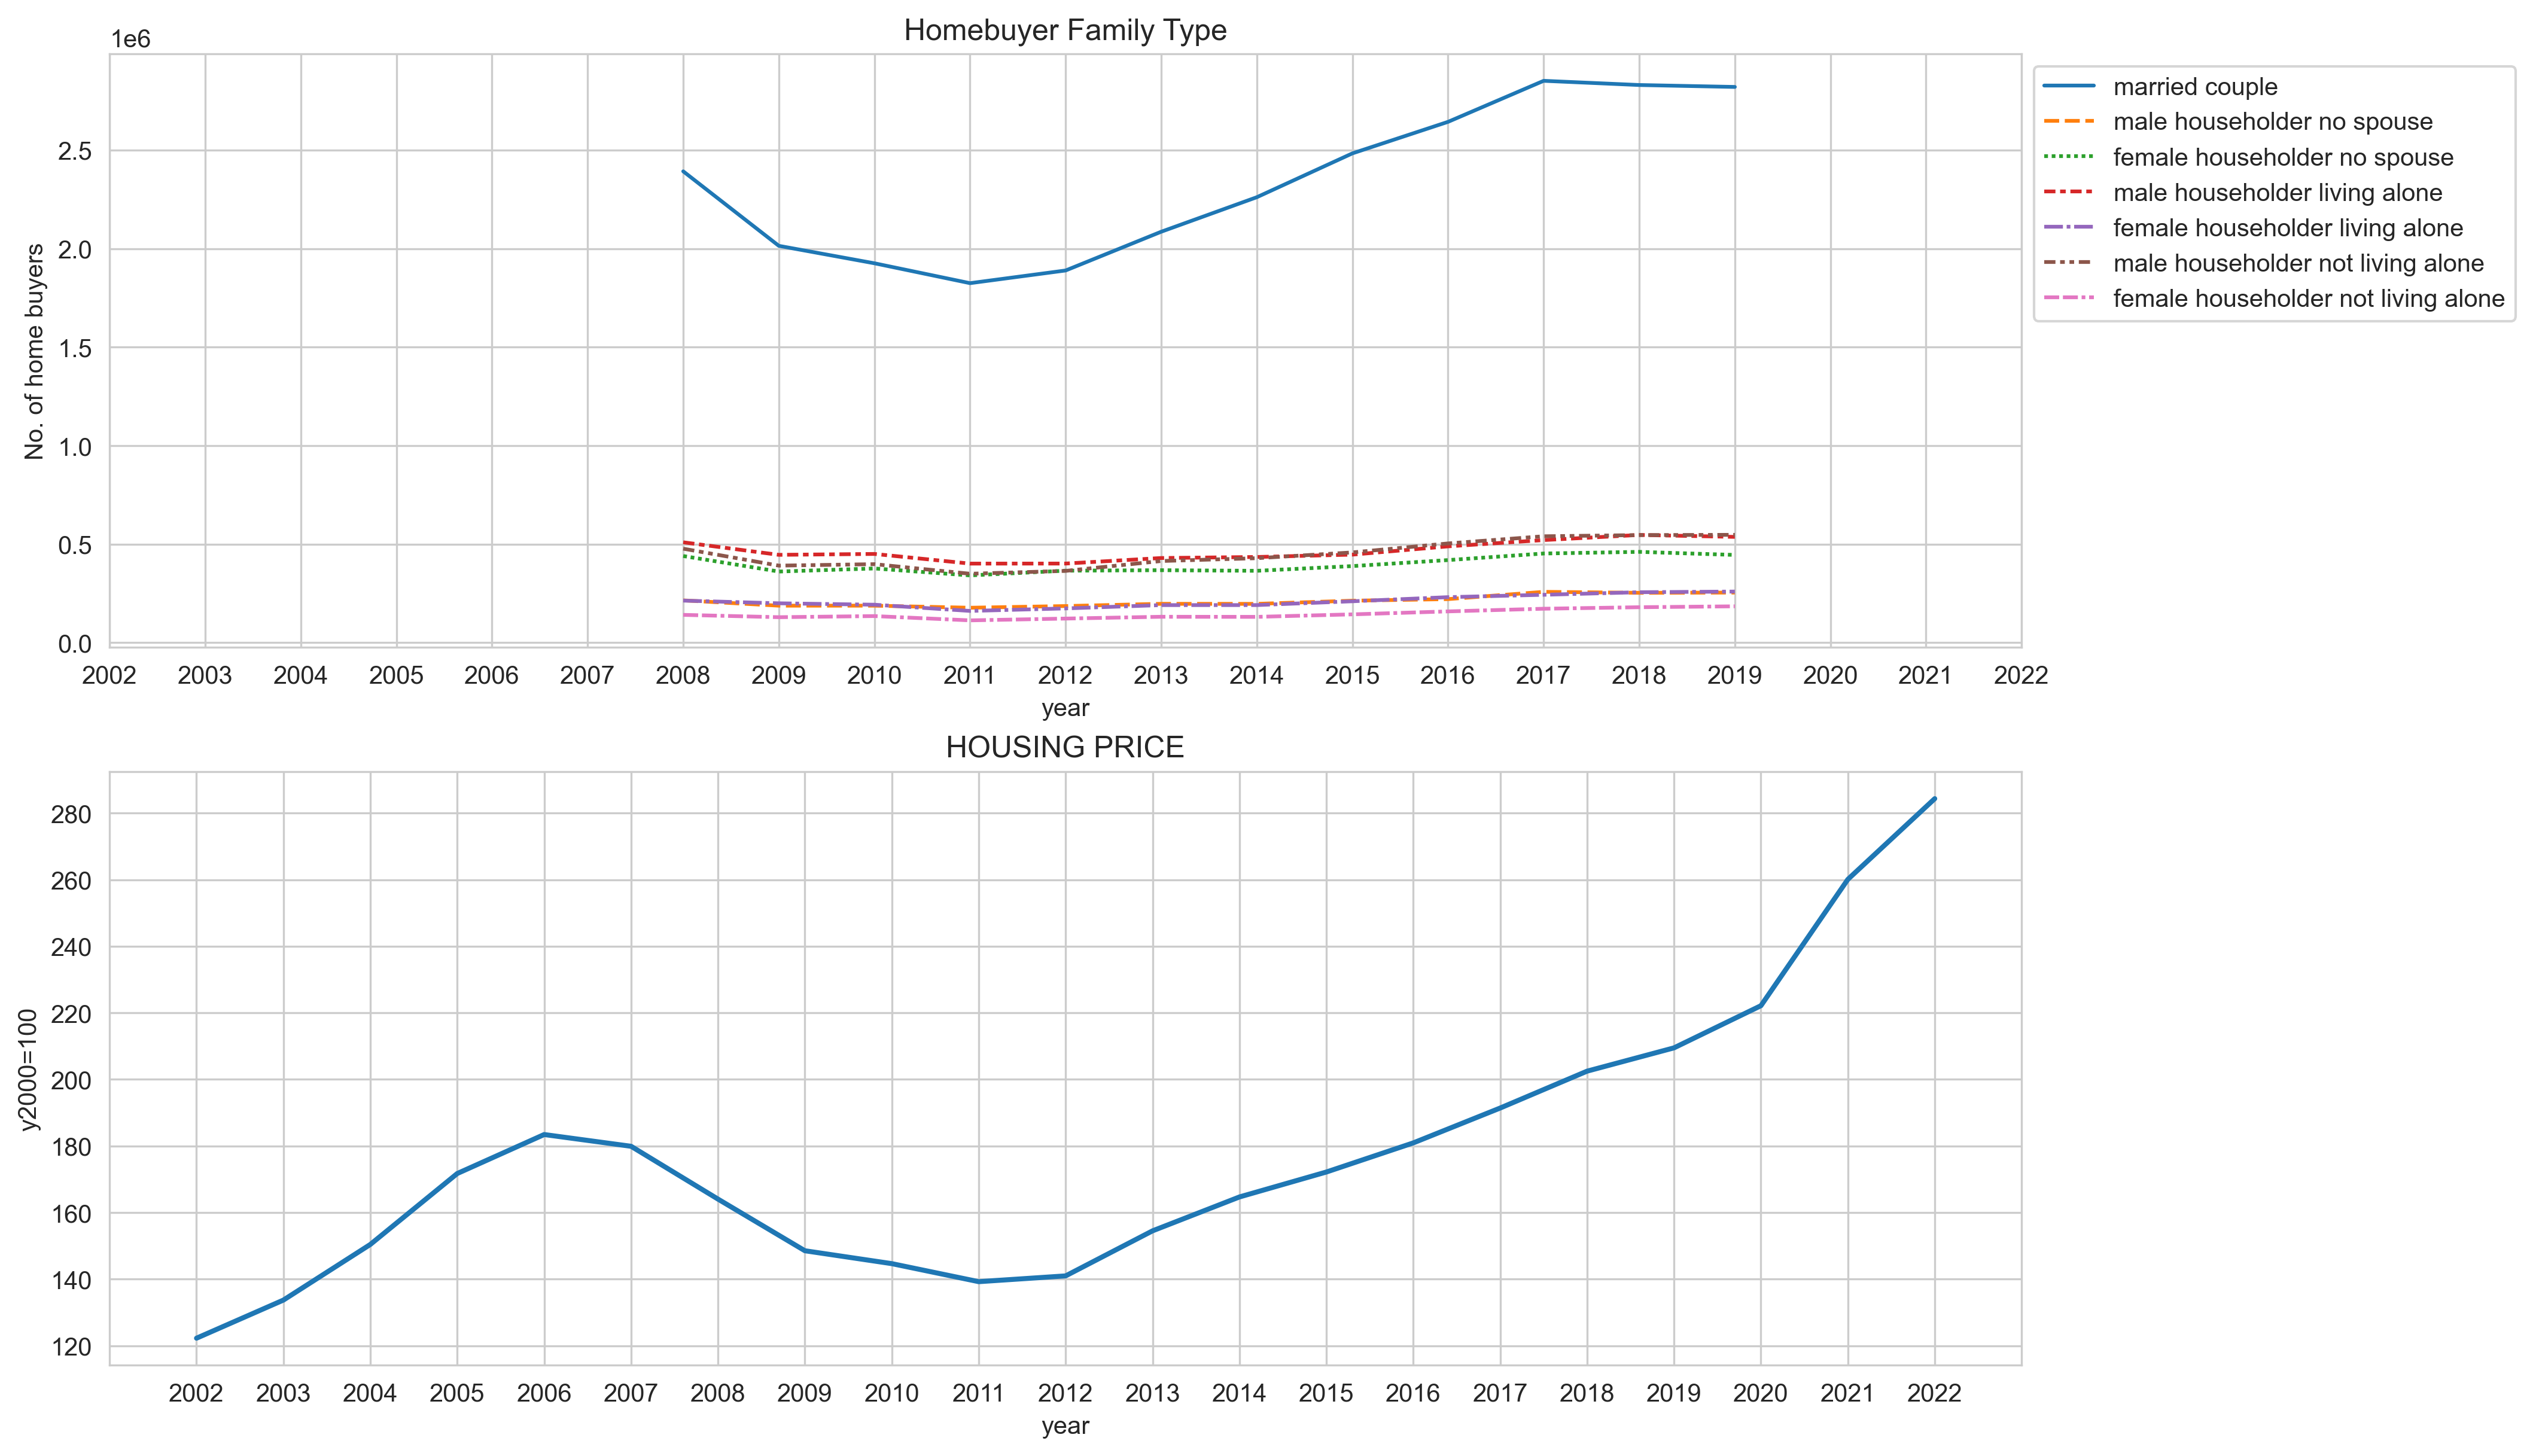

In [811]:
figure,ax = plt.subplots(2,1,constrained_layout=True,figsize=(14,8),dpi=300) 

#buyer_demographic_household_education: 
sb.lineplot(ax= ax[0],data = df_demo_hh_fam)
ax[0].set(xlabel="year", ylabel = "No. of home buyers")
ax[0].set_title("Homebuyer Family Type")
ax[0].set_xticks(np.arange(2002, 2023, 1.0))
ax[0].legend(loc='best', bbox_to_anchor=(1, 1))

#housing prices
sb.lineplot(ax=ax[1],data = housing_prices, x="year", y="median housing price", linewidth = 2)
ax[1].set_title("HOUSING PRICE")
ax[1].set(xlabel="year", ylabel = "y2000=100")
ax[1].set_xticks(np.arange(2002, 2023, 1.0)) 


In [813]:
#END OF PROJECT